# Artificial Neural Networks

#### Imports

In [1]:
# You may only use numpy to implement your neural network
# You are not allowed to use scikit-learn, other than for Section 1.6.
# You are also not allowed to use Pytorch, Tensorflow, and similar machine learning frameworks.
# You can make use of any other libraries for miscellaneous functions, e.g. to create the visual aids.

# Put all of your imports in this code block
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as  pd
import time
import csv
import ast
import re
import math
import copy

from tqdm import tqdm
from enum import Enum



#used to prevent divide by 0 errors
epsilon = 1e-8

#### Loading the data

In [2]:
features = np.genfromtxt("../Assignment 1/data/features.txt", delimiter=",")
targets = np.genfromtxt("../Assignment 1/data/targets.txt", delimiter=",")
unknown = np.genfromtxt("../Assignment 1/data/unknown.txt", delimiter=",")


#### Exploring the data


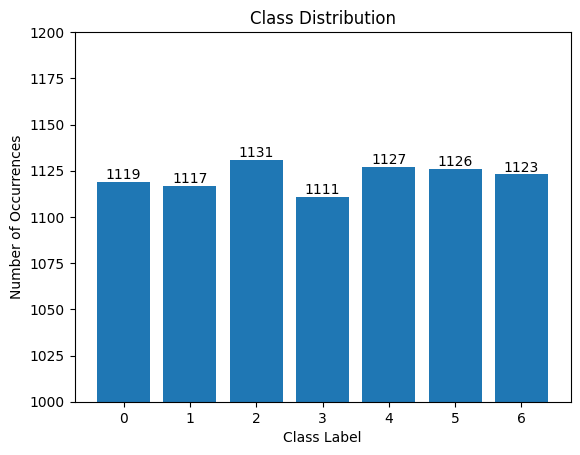

Basic statistics about our data:
Number of samples: 7854
Number of features: 10
Number of unkown targets: 784

Feature Ranges:
Range of feature 1 is: (-0.59015, 1.6869)
Range of feature 2 is: (-0.6862, 1.6807)
Range of feature 3 is: (-0.65305, 1.7881)
Range of feature 4 is: (-0.75986, 1.6794)
Range of feature 5 is: (-0.74038, 1.6523)
Range of feature 6 is: (-0.77253, 1.691)
Range of feature 7 is: (-0.75764, 1.66)
Range of feature 8 is: (-0.87969, 1.8136)
Range of feature 9 is: (-0.70479, 1.7576)
Range of feature 10 is: (-0.66557, 1.6321)


In [3]:
class_counts = np.bincount(targets.astype(int)-1) #calculate how often each class appears
feature_ranges = [(np.min(features[:, i]), np.max(features[:, i])) for i in range(features.shape[1])] #calculate the range of each feature

#plot the bar graph with the number of occurences for each class
plt.bar(range(len(class_counts)), class_counts, tick_label=range(len(class_counts)))

for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom') #put the actual numbers on the bars
    
plt.xlabel('Class Label')
plt.ylabel('Number of Occurrences')
plt.title('Class Distribution')
plt.ylim(1000, 1200)  #cap the y axis so we can see the differences better
plt.show()

print("Basic statistics about our data:")
print(f"Number of samples: {len(targets)}")
print(f"Number of features: {features.shape[1]}")
print(f"Number of unkown targets: {len(unknown)}")

print("\nFeature Ranges:")
for i, (min_val, max_val) in enumerate(feature_ranges):
    print(f"Range of feature {i + 1} is: ({min_val}, {max_val})")

## 1 Questions
### 1.2 Architecture
#### Question 1:

In [4]:
class Perceptron: 
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_function = lambda x: np.where(x >= 0, 1, 0) #if x is bigger or equal to 0 we fire a 1, otherwise we fire a 0
        self.bias = None
        self.weights = None
        
    def fit(self, X, y):
        number_samples, number_features = X.shape
        
        self.bias = 0
        self.weights = np.random.uniform(low = -0.5, high= 0.5 ,size=number_features)
        
        for _ in range(self.n_iters): #loop at most the max number of iterations
            
            for index, x_i in enumerate(X): 
                
                z = np.dot(self.weights.T, x_i) + self.bias #calculate z = w^t * x + b, this is the performance inference step
                y_predict = self.activation_function(z) #apply the activation function
                
                loss = y[index] - y_predict #calculate the loss
                
                #update the weights
                self.weights += self.learning_rate * x_i * loss #for each weight: weight = weight + α * x * 𝓛
                self.bias += self.learning_rate * loss #bias = bias + α * 𝓛
                
                # here we check if we can exit early, and thus don't need our max number of iterations
                if np.array_equal(self.activation_function(np.dot(self.weights, X.T) + self.bias), np.array(y)): break


    def predict(self, X):
        return self.activation_function(np.dot(X, self.weights) + self.bias) #apply the activiation function to the output of dot(x, weights) + bias



#function to calculate the accuracy of the predictions
def accuracy(y_predict, y):
    return np.sum(np.array(y_predict) == np.array(y)) / len(y)

#function to plot the decision boundary and points
def plot_decision_boundary(ax, perceptron, X, y, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn', edgecolors='k', marker='o', s=100)

    #plot the decision boundary
    if perceptron.weights is not None and perceptron.bias is not None:  #check if weight and bias have been initialized
        x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2             #find the range for the x axis
        y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2             #find the range for the y axis

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) #create a meshgrid with step size 0.01 

        Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) #predict for the points in the grid and fix the shape
        ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='b') #we draw a line at the descision boundry

    ax.set_title(title) #set the title of the plot

accurracy percepton or: 1.0
accurracy percepton and: 1.0
accurracy percepton xor: 0.25


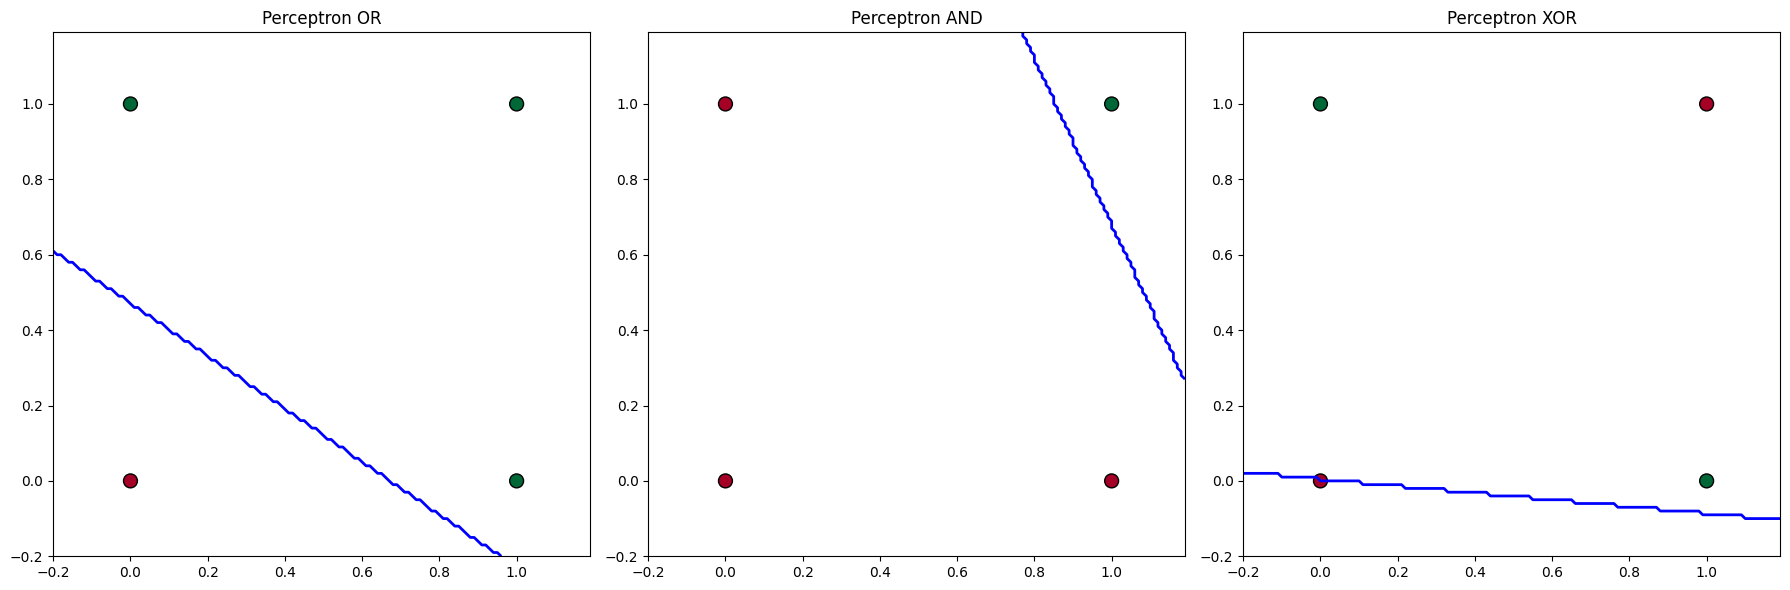

In [5]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = [0, 1, 1, 1]
y_and = [0, 0, 0, 1]
y_xor = [0, 1, 1, 0]

perceptron_or = Perceptron()
perceptron_and = Perceptron()
perceptron_xor = Perceptron()

perceptron_or.fit(X=X, y= y_or)
perceptron_and.fit(X=X, y=y_and)
perceptron_xor.fit(X=X, y=y_xor)

predicts_or = []
predicts_and = []
predicts_xor = []

for data in X:
    predicts_or.append(perceptron_or.predict(X=data))
    predicts_and.append(perceptron_and.predict(X=data))
    predicts_xor.append(perceptron_xor.predict(X=data))
    
print(f"accurracy percepton or: {accuracy(predicts_or, y_or)}")
print(f"accurracy percepton and: {accuracy(predicts_and, y_and)}")
print(f"accurracy percepton xor: {accuracy(predicts_xor, y_xor)}")


#create plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundary(axs[0], perceptron_or, X, y_or, 'Perceptron OR')
plot_decision_boundary(axs[1], perceptron_and, X, y_and, 'Perceptron AND')
plot_decision_boundary(axs[2], perceptron_xor, X, y_xor, 'Perceptron XOR')
plt.tight_layout()
plt.show()

<div style="background-color:#f1be3e">

The single perceptron was able to learn a model to 100% correctly classify points for "and" and "or". It was however unable to do this for the "xor", since "xor" displays a checkerboard distribution it is impossible to correctly classify this with the linear step function we used.

In the code where we train our perceptron we added an if statement to exit early if we correctly classify all points in our training set. If we never go into this path, we terminate when we hit the max number of iterations.

#### Question 2

<div style="background-color:#f1be3e">

Since we have 10 different features, for every sample we need to be able to input 10 different values. Thus we would need 10 input neurons

#### Question 3

<div style="background-color:#f1be3e">

Since we have 7 classes we have to classify, so we would need to have 7 neurons for the different classes. We thought about having a single output neuron that would a give a range, however since the sigmoid functions all give a number within the real number line it would be difficult to put ranges on them. We can use 7 output neurons with each neuron being a single class, this would also be useful calculating the loss function. Since for backpropagation we would know the desired output label.

#### Question 4

<div style="background-color:#f1be3e">

As we have no way of fully knowing the complexity of the relationship in our data, we think it would be a good approach to start small and with just one hidden layer. Not only is this easier to tune, but it also allows us to cover our bases. If we find out that this model does not have a good performance, we can then begin expanding our network and adding more layers. We would like to start with 7 neurons in our hidden layer, particularly because we also have 7 classes in our dataset. 

#### Question 5

<div style="background-color:#f1be3e">

We think about using sigmoid or hyperbolic tangent for the hidden layers. We don't want to use the linear functions because we are (probably) working with non-linear samples. Sigmoid and hyperbolic tangent are especially suited for smaller network sizes, and we have chosen to start with sigmoid.

For the final layer, since this is a multi-class classification task with mutually-exclusive labels (i.e. each object can only be classified into one class), the softmax activation function makes the most sense to use. 

#### Question 6

![ANN Diagram.png](<ANN_Diagram.png>)

<div style="background-color:#f1be3e">

_Write your answer here. You can include images using the syntax !.[title].(filepath), removing decimal points therein._

### 1.3 Training

When coding a neural network from scratch, it helps to think of a layer as an individual component that can be easily combined with other layers. To help you create a modular implementation of a neural network, we provide you with a template for the implementation along with some explanations.

**Note that using the template below is not mandatory. You may choose to modify this template or implement your own version of the neural network altogether. If the latter, please remove our template from the notebook and ensure that it instead includes a complete, fully functional implementation of your own.**

**Linear (fully connected) layer**

A linear or fully connected layer maps the input data to an output by performing a linear transformation, where each input neuron is connected to every output neuron. The forward pass of a linear layer is computed as $y = wx + b$, where $w$ and $b$ are trainable parameters. The gradients of the loss with respect to $w$ and $b$ are defined using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial b}, $$

where $\frac{\partial \mathcal{L}}{\partial y}$ is the upstream gradient i.e., the gradient flowing from deeper layers into the current layer, and the other two terms are the local gradients:

$$
\frac{\partial y}{\partial w}=x, \quad \frac{\partial y}{\partial b}=1.
$$

Since $x$ is needed to compute the gradients, we can store (cache) its value during the forward pass. Finally, we need to return a downstream gradient so that more shallow layers can use it as their upstream gradient. The downstream gradient of a layer is simply its upstream gradient multiplied by the local gradient of its ouput with respect to its input:

$$
\frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

**Note.** Be aware of how you multiply the arrays, it might be useful to print the shapes of each array and to think about the desired shape of the output.  

In [6]:
class Weight_Initialization(Enum):
    NORMAL = "normal"
    UNIFORM = "uniform"
    XAVIER = "xavier"
    HE = "he"
    CONSTANT = "constant"

    @staticmethod
    def init_weights(weight_type, in_features, out_features):
        if weight_type == Weight_Initialization.NORMAL:
            return Weight_Initialization._init_normal(in_features, out_features)
        elif weight_type == Weight_Initialization.UNIFORM:
            return Weight_Initialization._init_uniform(in_features, out_features)
        elif weight_type == Weight_Initialization.XAVIER:
            return Weight_Initialization._init_xavier(in_features, out_features)
        elif weight_type == Weight_Initialization.HE:
            return Weight_Initialization._init_he(in_features, out_features)
        elif weight_type == Weight_Initialization.CONSTANT:
            return Weight_Initialization._init_constant(in_features,out_features)
        else:
            raise ValueError(f"{type(weight_type)}, Invalid weight initialization option")

    @staticmethod
    #normal initialziation of the weights. Normal with mean at 0, and std 0.5, this means 95.4% of the numbers generated will be between -1 and 1.
    def _init_normal(in_features, out_features):
        return np.random.normal(0, 0.5, size=(in_features, out_features))

    @staticmethod
    #uniform initialization of the weights. Unifrom between -1 and 1
    def _init_uniform(in_features, out_features):
        return np.random.uniform(-1, 1, size=(in_features, out_features))

    @staticmethod
    #xavier initialization of the weights
    #use the xavier initialization when you use a sigmoid or hyperbolic tangent activation function
    def _init_xavier(in_features, out_features):
        return np.random.normal(0, np.sqrt(1/in_features), size=(in_features, out_features))

    @staticmethod
    #he initialization of the weights
    #use the he initialization when you use the ReLu or LReLu activation functions
    def _init_he(in_features, out_features):
        return np.random.normal(0, np.sqrt(2/in_features), size=(in_features, out_features))
    
    @staticmethod
    #he initialization of the weights with a constant value epsilon
    def _init_constant(in_features, out_features):
        return np.full((in_features, out_features),epsilon)

**Activation functions**

You also need to implement an activation function suitable for the task at hand.

Think about how to perform the backward pass i.e., what is the local gradient and what the downstream gradient should be. Do not forget to take the upstream gradient into account.

In [7]:
class Activation_Interface:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """
        pass
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        pass

class Activation_Identity(Activation_Interface):
    def forward(self, x):
        return x
    
    def backward(self, dupstream):
        return dupstream
    
    
class Activation_Sigmoid(Activation_Interface):
    
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """

        # y = np.where(x > 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))
        y = 1/(1 + np.exp(-x))
        self.cache = y
        return y
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        return  dupstream * (1 - self.cache) * self.cache
    
    
    
    
class Activation_Tanh(Activation_Interface):
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """
        self.cache = np.tanh(x)
        return self.cache
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        return (1 - self.cache ** 2) * dupstream




class Activation_Softmax(Activation_Interface):
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        self.cache = exps / np.sum(exps, axis=1, keepdims=True)
        return self.cache
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        dinputs = np.empty_like(dupstream)
         # Enumerate outputs and gradients
        for index, (single_output, single_dupstream) in enumerate(zip(self.cache, dupstream)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            dinputs[index] = np.dot(jacobian_matrix, single_dupstream)
        return dinputs




class Activation_ReLU(Activation_Interface):
    def forward(self, x):
        self.cache = x
        return np.maximum(0, x)

    def backward(self, dupstream):
        # return gradient only if positive value (negative values are unaffected by any change)
        dinputs = dupstream.copy()
        dinputs[self.cache <= 0] = 0
        return dinputs
 



class Activation_LReLU(Activation_Interface):
    #this is the leaky ReLu with a hardcoded alhpa, 0.1.
    
    def forward(self, x):
        self.cache = x
        return np.maximum(0.1 * x, x)

    def backward(self, dupstream):
        dinputs = dupstream.copy()
        dinputs[self.cache <= 0] *= 0.1
        return dinputs

In [8]:
class Linear:
    def __init__(self, in_features, out_features, weight_init: Weight_Initialization, activation_funct: Activation_Interface):
        """ 
        Args:
            in_features: number of input features.
            out_features: number of output features.
            weight_init: method which we initialize the orignal weights
            activation_funct: activation function for this layer
        """
        
        self.weight = Weight_Initialization.init_weights(weight_init, in_features, out_features) # in_features, out_features
        self.bias =  np.zeros((1, out_features), dtype=float) # 1, out_features

        self.cache = None
        self.activation_function = activation_funct
        
        # For storing the gradients w.r.t. the weight and the bias
        self.weight_grad = None
        self.bias_grad = None

    def forward(self, x):
        """ Perform the forward pass of a linear layer. 
        Store (cache) the input so it can be used in the backward pass.

        Args:
            x: input of a linear layer.

        Returns: 
            y: output of a linear layer. 
        """
        self.cache = x # n, in_features
        return np.dot(x, self.weight) + self.bias # n, out_features
        
    
    def backward(self, dupstream):
        """ Perform the backward pass of a linear layer.  

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        # dupstream is the gradient of the loss w.r.t. the output of the linear layer dL0/dz(L)
        dx = np.dot(dupstream, self.weight.T) # dx = dL0/dz(L) * dz(L)/dx = dL0/dx = dL0/dh(L-1) ,which is the gradient of the loss w.r.t. the input of the linear layer
        # dupstream should be a matrix of shape (batch_size, out_features) but now it is (1, out_features) since it is an average of the gradients of the batch
        #self.weight_grad = np.dot(np.vstack(np.mean(self.cache, axis=0)), np.vstack(dupstream).T) # dL0/dz(L) * dz(L)/dw = dL0/dw
        self.weight_grad = np.dot(self.cache.T, dupstream) # dL0/dz(L) * dz(L)/dw = dL0/dw
        self.bias_grad = np.sum(dupstream, axis=0, keepdims=True) # dL0/dz(L) * dz(L)/db = dL0/db
        return dx

**Network** 

Now that you have implemented a `Linear` layer and an activation function, you can combine them in different ways and have the `Network` class perform forward and backward passes through all layer of the network in the specified order.

Additionally, you should make the `Network` class update all the trainable parameters of the network in `optimizer_step`.

In [9]:
class Network:
    def __init__(self, layers, alpha=0):
        self.layers = layers
        self.alpha = alpha

    def forward(self, x):
        """ Perform a forward pass over the entire network.

        Args:
            x: input data. 

        Returns:
            y: predictions.
        """
        current_input = x
        current_z_value = None
        for layer in self.layers:   
            current_z_value = layer.forward(current_input)
            
            current_input = layer.activation_function.forward(current_z_value)
            
        return current_input
            
    
    def backward(self, dupstream):
        """ Perform a backward pass over the entire network.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        current_dupstream = dupstream
        if self.alpha != 0:
            value = 0
            for layer in self.layers:
                value += np.sum(layer.weight * layer.weight)
            current_dupstream = dupstream + self.alpha * value / self.layers[0].cache.shape[0]
        current_dupstream_activation = None
        for layer in reversed(self.layers):
            current_dupstream_activation = layer.activation_function.backward(current_dupstream)
            current_dupstream = layer.backward(current_dupstream_activation) #this dupstream_dactivation is the gradient of the loss w.r.t. the z(L)
    
    def optimizer_step(self, lr):
        """ Update the weight and bias parameters of each layer.

        Args:
            lr: learning rate.
        """
        
        for layer in self.layers:
            layer.weight -= lr * layer.weight_grad
            layer.bias -= lr * layer.bias_grad

**Loss function**

You also need to implement a loss function that will measure how well your neural network performs at the task.

In [10]:
def Loss(y_true, y_pred, alpha=0):
    """ Computes the value of the loss function and its gradient.  

    Args:
        y_true: ground truth labels.
        y_pred: predicted labels.

    Returns:
        loss: value of the loss. 
        grad: gradient of loss with respect to the predictions. 
    """

    # Compute the loss
    # categorical cross-entropy
    y_true_onehot = np.eye(y_pred.shape[1])[y_true.astype(int)-1]

    num_samples = len(y_pred)
   
    return np.mean(-np.sum(y_true_onehot * np.log(y_pred+epsilon),axis = 1)), (-y_true_onehot/(y_pred+epsilon))/(num_samples+epsilon)

**Training loop**

Finally, define a training loop in which for each optimizer step you:

1. Obtain the predictions by performing a forward pass of the network;

2. Compute the loss and its gradient by comparing the predictions with the ground truth according to the selected criterion;

3. Perform a backward pass of the network;

4. Update all parameters of the network i.e, take an optimizer step.

In [11]:
def get_accuracy(y_true, y_pred):
    """ Computes the accuracy of the predictions.

    Args:
        y_true: ground truth labels.
        y_pred: predicted labels.

    Returns:
        accuracy: the accuracy of the predictions.
    """
    return np.sum(y_true == np.argmax(y_pred, axis=1) + 1) / len(y_true)

In [12]:
def split_data(inputs, labels, train_ratio=0.7, val_ratio=0.15, random_seed=42):
    total_samples = len(inputs)
    indices = np.arange(total_samples)

    #shuffle the indices to make sure of a random distribution
    #we use a seed to make training consistent
    np.random.seed(random_seed)
    np.random.shuffle(indices)

    #get the different labels and count how often they appear
    unique_labels, label_counts = np.unique(labels, return_counts=True)

    #calculate how many occurences of each label should be in each class
    train_label_counts = np.floor(label_counts * train_ratio).astype(int)
    val_label_counts = np.floor(label_counts * val_ratio).astype(int)

    #create a dictionary with as key the label and as value a counter
    #we will use this to keep track of how many times each label occurs in the set
    train_counters = {label: 0 for label in unique_labels}
    val_counters = {label: 0 for label in unique_labels}

    train_indices, val_indices, test_indices = [], [], []

    #go over the indices and assign to a set
    for index in indices:
        label = int(labels[index])
        
        #make sure the label is an int to mitigate errors
        if not isinstance(label, int):
            print(label)
            continue
        
        # find the index of the label
        i = unique_labels.tolist().index(label)
        if train_counters[label] < train_label_counts[i]:
            train_indices.append(index)
            train_counters[label] += 1

        elif val_counters[label] < val_label_counts[i]:
            val_indices.append(index)
            val_counters[label] += 1

        else:
            test_indices.append(index)

    #create the feature and label arrays
    train_inputs, train_labels = inputs[train_indices], labels[train_indices]
    val_inputs, val_labels = inputs[val_indices], labels[val_indices]
    test_inputs, test_labels = inputs[test_indices], labels[test_indices]

    return (train_inputs, train_labels), (val_inputs, val_labels), (test_inputs, test_labels)


In [13]:
def shuffle_train_data(inputs, labels):
    total_samples = len(inputs)
    indices = np.arange(total_samples)
    np.random.shuffle(indices)
    return inputs[indices], labels[indices]

In [14]:
def train(net, inputs, labels, lr=0.1, batch_size=32, epochs=50, stop_early_threshold= 60):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        lr: learning rate.
        batch_size: size of the mini batches
        epochs: max number of epochs for training
        stop_early_threshold: number of checkpoints of not improving before we stop early or None if we don't want to stop early

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list containing the accuracy at every checkpoint.
        weigths_collection: a list containing lists of tuples (weights of a layer, bias of a layer). These are backups of our network throughout our training process.
    """
    losses = []
    accuracies = []
    weights_collection = []

    best_validation_loss = float('inf')
    checkpoints_since_best = 0

    (train_inputs, train_labels), (val_inputs, val_labels), (test_inputs, test_labels) = split_data(inputs, labels)
    num_mini_batches = len(train_inputs) // batch_size
    
    # For each epoch
    for epoch in range(epochs):
        
        # shuffle the data and split the data into batches
        shuffled_train_inputs, shuffled_train_labels = shuffle_train_data(train_inputs, train_labels)
        
        for i in range(num_mini_batches):
            
            #check if this batch is a checkpoint, number of checkpoints is hardcoded to 3
            if i % (num_mini_batches // 3) == 0:
                test_pred = net.forward(test_inputs)
                accuracy = get_accuracy(test_labels, test_pred)
                accuracies.append(accuracy)
                val_pred = net.forward(val_inputs)
                validation_loss, _ = Loss(val_labels, val_pred)
                all_training_loss, _ = Loss(train_labels,net.forward(train_inputs))
                weights_bias = []

                for layer in net.layers:
                    weights_bias.append((layer.weight, layer.bias))
                    
                weights_collection.append(weights_bias)
                losses.append((all_training_loss, validation_loss))
                

                #check to stop early if we stop improving and the threshold is not None
                if not stop_early_threshold == None:
                    if validation_loss < best_validation_loss:
                        best_validation_loss = validation_loss
                        checkpoints_since_best = 0
                    
                    else:
                        checkpoints_since_best += 1

                    #if we did not improve before we hit the stop early threshold.
                    if checkpoints_since_best >= stop_early_threshold:
                        print(f"stopped early at epoch: {epoch+1}")
                        print(f"this validation loss was: {validation_loss}, best validation loss was: {best_validation_loss}")
                        print(f"final accurracy was: {accuracy}")
                        return losses, accuracies, weights_collection

            start = i * batch_size
            end = (i + 1) * batch_size
            x = shuffled_train_inputs[start:end]
            y = shuffled_train_labels[start:end]
            y_pred = net.forward(x)
            _, grad = Loss(y, y_pred)
            
            net.backward(grad)
            net.optimizer_step(lr)
    
    # print(f"final accurracy was: {accuracy}")
    return losses, accuracies, weights_collection
    

In [15]:
def initialize_network(layers_input, weight_initialization=Weight_Initialization.XAVIER ,hidden_layer_function=Activation_Sigmoid(), alpha=0):
    """
    This method creates a Network instance.
    args:
        layers_input: A list wich contains the information for the sizes of the layers.
        weight_initialization: Either a list containing the weight init methods for every layer, or a single instance in whitch case we use that method for every layer
        hidden_layer_functions: a list containing for every layer the activaiton function.
    """

    #if just one instance is provided we use this method for the whole network 
    if not isinstance(weight_initialization, list):
        weight_initialization = [weight_initialization for _ in range(len(layers_input)-1)]

    if not isinstance(hidden_layer_function, list):
        hidden_layer_function = [type(hidden_layer_function)() for _ in range (len(layers_input)-2)] + [Activation_Softmax()]
    
    #check if the lenght of is correct, otherwise throw an error
    if len(layers_input)-1 != len(hidden_layer_function):
        raise ValueError("length of layers and activation functions does not match")
    
    if len(layers_input)-1 != len(weight_initialization):
        raise ValueError("length of weight init methods does not match the number of layers")
    
    layers = []
    #fill the array of layers with instances of Linear
    for i in range(len(layers_input)-1):
        layers.append(Linear(layers_input[i], layers_input[i+1], weight_initialization[i], hidden_layer_function[i]))
    
    return Network(layers, alpha=alpha)

#### Question 7

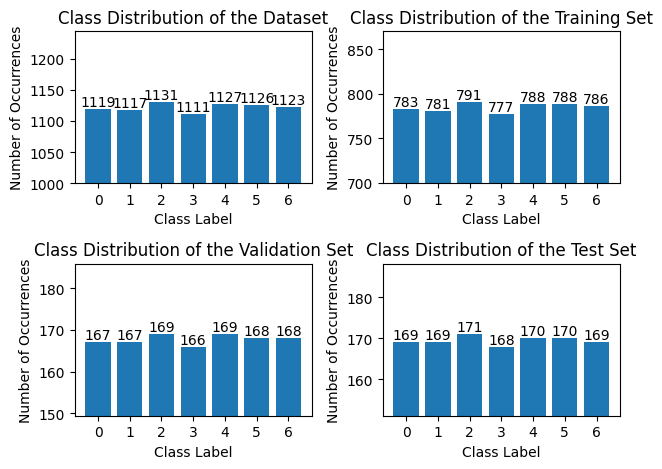

In [16]:
def split_data(inputs, labels, train_ratio=0.7, val_ratio=0.15, random_seed=42):
    total_samples = len(inputs)
    indices = np.arange(total_samples)

    #shuffle the indices to make sure of a random distribution
    #we use a seed to make training consistent
    np.random.seed(random_seed)
    np.random.shuffle(indices)

    #get the different labels and count how often they appear
    unique_labels, label_counts = np.unique(labels, return_counts=True)

    #calculate how many occurences of each label should be in each class
    train_label_counts = np.floor(label_counts * train_ratio).astype(int)
    val_label_counts = np.floor(label_counts * val_ratio).astype(int)

    #create a dictionary with as key the label and as value a counter
    #we will use this to keep track of how many times each label occurs in the set
    train_counters = {label: 0 for label in unique_labels}
    val_counters = {label: 0 for label in unique_labels}

    train_indices, val_indices, test_indices = [], [], []

    #go over the indices and assign to a set
    for index in indices:
        label = int(labels[index])
        
        #make sure the label is an int to mitigate errors
        if not isinstance(label, int):
            print(label)
            continue
        
        # find the index of the label
        i = unique_labels.tolist().index(label)
        if train_counters[label] < train_label_counts[i]:
            train_indices.append(index)
            train_counters[label] += 1

        #Fill up the validation set if the training set quota has been filled
        elif val_counters[label] < val_label_counts[i]:
            val_indices.append(index)
            val_counters[label] += 1
        
        #Fill up the test set if both training and validation sets have been filled
        else:
            test_indices.append(index)

    #create the feature and label arrays
    train_inputs, train_labels = inputs[train_indices], labels[train_indices]
    val_inputs, val_labels = inputs[val_indices], labels[val_indices]
    test_inputs, test_labels = inputs[test_indices], labels[test_indices]

    return (train_inputs, train_labels), (val_inputs, val_labels), (test_inputs, test_labels)

def plot_distribution(features, targets, title='Class Distribution', plot_coord=None):
    class_counts = np.bincount(targets.astype(int)-1) #calculate how often each class appears
    feature_ranges = [(np.min(features[:, i]), np.max(features[:, i])) for i in range(features.shape[1])] #calculate the range of each feature

    #Used if we want to use subplots to put plots side by side
    if plot_coord is not None:
        plt.subplot(plot_coord[0], plot_coord[1], plot_coord[2])

    #plot the bar graph with the number of occurences for each class
    plt.bar(range(len(class_counts)), class_counts, tick_label=range(len(class_counts)))

    for i, count in enumerate(class_counts):
        plt.text(i, count, str(count), ha='center', va='bottom') #put the actual numbers on the bars

    plt.xlabel('Class Label')
    plt.ylabel('Number of Occurrences')
    plt.title(title)
    plt.ylim(min(class_counts)*0.9, max(class_counts)*1.1)  #cap the y axis so we can see the differences better

    if plot_coord is None:
        plt.show()

(X_train, y_train), (X_validate, y_validate), (X_test, y_test) = split_data(features, targets)
plot_distribution(features, targets, "Class Distribution of the Dataset", (2,2,1))
plot_distribution(X_train, y_train, "Class Distribution of the Training Set", (2,2,2))
plot_distribution(X_validate, y_validate, "Class Distribution of the Validation Set", (2,2,3))
plot_distribution(X_test, y_test, "Class Distribution of the Test Set", (2,2,4))
plt.tight_layout() # Prevents overlapping between the subplots
plt.show()


<div style="background-color:#f1be3e">

We will split our data in to 3 groups: a training set, a validation set and a test set.

The training set will be about 70% of the data and this is where we will create our mini batches from.

The validation and test set both will be about 15% of the data, the validation set will be used to measure the performance during the training of our ANN.

The test set will only be used to test the performance of our hyperparameters.

When we split our data into the 3 sets, we make sure the distribution of the target labels stay similar across the three sets. This way, we can more accurately measure the performance of our model and prevent getting results that have been skewed by random bias as a result of random assignment to sets. In our program, this is done by calculating the expected number of occurrences of each label using the ratio of the set to the whole data and then filling each set until each set's label quotas have been met.

The split_data method performs this label occurrence calculation and splitting into three sets, and has been copied above to ease checking.

As a final check, to ensure that this method of preserving each class' distribution works and that their iid property remains after splitting, we have also plotted the class distribution of the three sets and the dataset (see the 4 plots above). The three graphs of the sets compared to our dataset's initial distribution show that the distributions have not been changed as a result of the splitting, allowing us to train better and more accurate models later on.

To ensure reproducibility, we can use a seed to ensure that our steps that include randomness will be consistent.
</div>

#### Question 8

<div style="background-color:#f1be3e">

We evaluate the performance of the network by looking at loss and accuracy.

We plot the training and validation loss of our network, as well as the test accuracy. We use the training and validation plot to evaluate whether we are over-fitting or under-fitting, and the test accuracy to see how well we can expect our model to predict future samples. 

Every epoch we have 3 checkpoints. At such check point we calculate the validation loss (the loss over the whole validation set), the training loss (the loss over the whole training set) and the accuracy over the test set. We save these results and after training return all those measurements, we can then create the graphs to see how the training process went.  We will create 2 graphs from them, 1 containing both the validation loss and the training loss, the other graph just containing the accuracy over the test set.

Since the test set is used nowhere in training and (as explained in question 7) has the same distribution of classes as the training set, the accuracy over the test set will be a good identifier on how well the model works.

As mentioned we also plot the validation and train loss in the same plot. This will give us some more information, we expect the validation loss to be slightly higher than the training loss, but the line of the validation loss should follow the same downward trend as the training loss. If they stay parallel but flatten out very soon, then this is a symptom of under-fitting. If however the train loss keeps going down, but the validation loss starts to go up, then this is a symptom of over-fitting.

Everytime we hit a checkpoint we also save the weights and biases of the current model. This way if we start over-fitting we can still "get back" the model before it started over-fitting.

For the implementation, look at the train method.

#### Question 9

<div style="background-color:#f1be3e">

#### Our Approach
Our training can end in two ways. 
First, if we reach the max number of epochs. This is a hyperparameter we give our train method, if we reach it we terminate and return everything we got up to that point.  
Second, if we reach the stop_early_threshold. This is another hyperparameter we provide our train method with, if our validation loss at the checkpoints did not improve before we reach the number of checkpoints that is our threshold, then we terminate early. And again return everything we got up to that point.

The default for the stop_early_threshold is 12 checkpoints, which is 4 epochs. Since we have 3 checkpoints per epoch.

#### Justification
As mentioned in Q8, the validation loss can give us information on whether we are over- or under-fitting. Once our validation loss stops decreasing for stop_early_threshold checkpoints, then we know for sure that our validation loss is experiencing an upward trend and starting to show signs of over-fitting. By stopping just before this point, we ensure that we get reasonable performance from our model and its chosen hyperparameters.

#### Question 10

In [17]:
def train_q10(net, train_inputs, train_labels, val_inputs, val_labels, lr=0.1, batch_size=32, epochs=50, stop_early_threshold= 60):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        lr: learning rate.
        batch_size: size of the mini batches
        epochs: max number of epochs for training
        stop_early_threshold: number of checkpoints of not improving before we stop early or None if we don't want to stop early

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list containing the accuracy at every checkpoint.
        weigths_collection: a list containing lists of tuples (weights of a layer, bias of a layer). These are backups of our network throughout our training process.
    """
    weights_bias = []

    best_validation_loss = float('inf')
    checkpoints_since_best = 0

    num_mini_batches = len(train_inputs) // batch_size
    
    # For each epoch
    for epoch in range(epochs):
        
        # shuffle the data and split the data into batches
        shuffled_train_inputs, shuffled_train_labels = shuffle_train_data(train_inputs, train_labels)
        
        for i in range(num_mini_batches):
            
            #check if this batch is a checkpoint, number of checkpoints is hardcoded to 3
            if i % (num_mini_batches // 3) == 0:
                val_pred = net.forward(val_inputs)
                validation_loss, _ = Loss(val_labels, val_pred)
  
                #check to stop early if we stop improving and the threshold is not None
                if not stop_early_threshold == None:
                    if validation_loss < best_validation_loss:
                        best_validation_loss = validation_loss
                        weights_bias = []
                        for layer in net.layers:
                            weights_bias.append((layer.weight, layer.bias))
                        checkpoints_since_best = 0
                    
                    else:
                        checkpoints_since_best += 1

                    #if we did not improve before we hit the stop early threshold.
                    if checkpoints_since_best >= stop_early_threshold:
                        for index, layer in enumerate(net.layers):
                            layer.weight, layer.bias = weights_bias[index][0], weights_bias[index][1]
                        print(f"stopped early at epoch: {epoch+1}")
                        print(f"this validation loss was: {validation_loss}, best validation loss was: {best_validation_loss}")
                        return

            start = i * batch_size
            end = (i + 1) * batch_size
            x = shuffled_train_inputs[start:end]
            y = shuffled_train_labels[start:end]
            y_pred = net.forward(x)
            _, grad = Loss(y, y_pred)
            
            net.backward(grad)
            net.optimizer_step(lr)
    return


In [18]:
def cross_validation_q10_unbias(network, inputs, labels, n_folds=5, lr=0.1, batch_size=32, epochs=150):
    #shuffle the data
    inputs, labels = shuffle_train_data(inputs, labels)
    
    #create a list to store the accuracies
    accs = []
    cross_validation_set = []
    input_set = inputs
    label_set = labels
    for i in range(n_folds):
        training_ratio = 1/(n_folds - i)
        (train_inputs, train_labels), _, (test_inputs, test_labels) = split_data(input_set, label_set, train_ratio=training_ratio, val_ratio=0.0, random_seed=42)
        input_set = test_inputs
        label_set = test_labels
        cross_validation_set.append((train_inputs, train_labels))
    for i in tqdm(range(n_folds)):
        network_copy = copy.deepcopy(network)
        # choose 1 from the validation set and use the rest as training set
        (val_inputs, val_labels) = cross_validation_set[i]
        train_inputs = np.concatenate([cross_validation_set[j][0] for j in range(n_folds) if j != i])
        train_labels = np.concatenate([cross_validation_set[j][1] for j in range(n_folds) if j != i])
        train_q10(network_copy, train_inputs, train_labels, val_inputs, val_labels, lr=lr, batch_size=batch_size, epochs=epochs)
        y_pred = network_copy.forward(val_inputs)
        accs.append(get_accuracy(val_labels, y_pred))
    return np.mean(accs)

In [19]:
# Using Sigmoid activation
network_xav_s = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.XAVIER, hidden_layer_function=Activation_Sigmoid())
network_he_s = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.HE, hidden_layer_function=Activation_Sigmoid())
network_norm_s = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.NORMAL, hidden_layer_function=Activation_Sigmoid())
network_uni_s = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.UNIFORM, hidden_layer_function=Activation_Sigmoid())
network_const_s = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.CONSTANT, hidden_layer_function=Activation_Sigmoid())

# Using ReLu activation
network_xav_r = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.XAVIER, hidden_layer_function=Activation_ReLU())
network_he_r = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.HE, hidden_layer_function=Activation_ReLU())
network_norm_r = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.NORMAL, hidden_layer_function=Activation_ReLU())
network_uni_r = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.UNIFORM, hidden_layer_function=Activation_ReLU())
network_const_r = initialize_network([10, 30, 7], weight_initialization=Weight_Initialization.CONSTANT, hidden_layer_function=Activation_ReLU())


In [20]:
# Tanh
sigmoid_accuracies = []
sigmoid_accuracies.append(cross_validation_q10_unbias(network_xav_s, features, targets))
sigmoid_accuracies.append(cross_validation_q10_unbias(network_he_s, features, targets))
sigmoid_accuracies.append(cross_validation_q10_unbias(network_norm_s, features, targets))
sigmoid_accuracies.append(cross_validation_q10_unbias(network_uni_s, features, targets))
sigmoid_accuracies.append(cross_validation_q10_unbias(network_const_s, features, targets))

# ReLu
relu_accuracies = []
relu_accuracies.append(cross_validation_q10_unbias(network_xav_r, features, targets))
relu_accuracies.append(cross_validation_q10_unbias(network_he_r, features, targets))
relu_accuracies.append(cross_validation_q10_unbias(network_norm_r, features, targets))
relu_accuracies.append(cross_validation_q10_unbias(network_uni_r, features, targets))
relu_accuracies.append(cross_validation_q10_unbias(network_const_r, features, targets))


 20%|██        | 1/5 [00:05<00:22,  5.55s/it]

stopped early at epoch: 88
this validation loss was: 0.20750156981796997, best validation loss was: 0.20261395314061145


 40%|████      | 2/5 [00:21<00:34, 11.54s/it]

stopped early at epoch: 123
this validation loss was: 0.20025427180815816, best validation loss was: 0.1988752588216713


 60%|██████    | 3/5 [00:26<00:16,  8.46s/it]

stopped early at epoch: 92
this validation loss was: 0.19464319370133898, best validation loss was: 0.1915500664445899


 80%|████████  | 4/5 [00:30<00:07,  7.03s/it]

stopped early at epoch: 83
this validation loss was: 0.2028754509358838, best validation loss was: 0.1991618671698269


100%|██████████| 5/5 [00:38<00:00,  7.66s/it]


stopped early at epoch: 75
this validation loss was: 0.18939578019452014, best validation loss was: 0.18387323313009823


 20%|██        | 1/5 [00:07<00:28,  7.12s/it]

stopped early at epoch: 64
this validation loss was: 0.220233023845551, best validation loss was: 0.21797323631828885


 40%|████      | 2/5 [00:10<00:14,  4.73s/it]

stopped early at epoch: 58
this validation loss was: 0.20696995308397684, best validation loss was: 0.2061424385049683


 60%|██████    | 3/5 [00:14<00:09,  4.51s/it]

stopped early at epoch: 80
this validation loss was: 0.17343572338929533, best validation loss was: 0.17294823001140994


 80%|████████  | 4/5 [00:18<00:04,  4.39s/it]

stopped early at epoch: 80
this validation loss was: 0.193167323336317, best validation loss was: 0.1924399516838028


100%|██████████| 5/5 [00:24<00:00,  4.96s/it]


stopped early at epoch: 113
this validation loss was: 0.1935594087707512, best validation loss was: 0.19146348642990677


 20%|██        | 1/5 [00:03<00:14,  3.53s/it]

stopped early at epoch: 67
this validation loss was: 0.19449177095435338, best validation loss was: 0.19183630830562343


 40%|████      | 2/5 [00:07<00:11,  3.99s/it]

stopped early at epoch: 78
this validation loss was: 0.2002208078089811, best validation loss was: 0.19768322864756493


 60%|██████    | 3/5 [00:13<00:09,  4.60s/it]

stopped early at epoch: 100
this validation loss was: 0.18547037602034283, best validation loss was: 0.1835717048995293


 80%|████████  | 4/5 [00:19<00:05,  5.42s/it]

stopped early at epoch: 107
this validation loss was: 0.21430940832789402, best validation loss was: 0.2126249725818463


100%|██████████| 5/5 [00:29<00:00,  5.84s/it]


stopped early at epoch: 101
this validation loss was: 0.19397919614108686, best validation loss was: 0.1914940873418324


 20%|██        | 1/5 [00:12<00:48, 12.25s/it]

stopped early at epoch: 82
this validation loss was: 0.2067379798940497, best validation loss was: 0.2035234730121815


 40%|████      | 2/5 [00:24<00:36, 12.07s/it]

stopped early at epoch: 73
this validation loss was: 0.18252820334473485, best validation loss was: 0.17868319401201885


 60%|██████    | 3/5 [00:33<00:21, 10.99s/it]

stopped early at epoch: 74
this validation loss was: 0.2035294182446435, best validation loss was: 0.1996267941439023


 80%|████████  | 4/5 [00:39<00:08,  8.89s/it]

stopped early at epoch: 106
this validation loss was: 0.20012611378865752, best validation loss was: 0.19823148474285632


100%|██████████| 5/5 [00:43<00:00,  8.61s/it]


stopped early at epoch: 64
this validation loss was: 0.20054700788400834, best validation loss was: 0.1995808143304929


 20%|██        | 1/5 [00:05<00:23,  5.76s/it]

stopped early at epoch: 40
this validation loss was: 0.1933773040717193, best validation loss was: 0.18440715629460544


 40%|████      | 2/5 [00:10<00:15,  5.16s/it]

stopped early at epoch: 32
this validation loss was: 0.19786795874180446, best validation loss was: 0.19265957104038262


 60%|██████    | 3/5 [00:13<00:08,  4.22s/it]

stopped early at epoch: 26
this validation loss was: 0.20683983052587726, best validation loss was: 0.19823336766872646


 80%|████████  | 4/5 [00:15<00:03,  3.38s/it]

stopped early at epoch: 40
this validation loss was: 0.219972766212492, best validation loss was: 0.21830069963500592


100%|██████████| 5/5 [00:17<00:00,  3.58s/it]


stopped early at epoch: 42
this validation loss was: 0.18095538188562243, best validation loss was: 0.178835674315617


 20%|██        | 1/5 [00:01<00:04,  1.12s/it]

stopped early at epoch: 22
this validation loss was: 0.22582252001231387, best validation loss was: 0.21787468919485314


 40%|████      | 2/5 [00:03<00:05,  1.75s/it]

stopped early at epoch: 33
this validation loss was: 0.21383658745631182, best validation loss was: 0.20721190367883327


 60%|██████    | 3/5 [00:05<00:03,  1.85s/it]

stopped early at epoch: 36
this validation loss was: 0.18749004437411837, best validation loss was: 0.18698680624903768


 80%|████████  | 4/5 [00:10<00:03,  3.10s/it]

stopped early at epoch: 57
this validation loss was: 0.16664039995534993, best validation loss was: 0.16627616700542616


100%|██████████| 5/5 [00:18<00:00,  3.75s/it]


stopped early at epoch: 54
this validation loss was: 0.2035882835545391, best validation loss was: 0.19883160523086227


 20%|██        | 1/5 [00:08<00:33,  8.30s/it]

stopped early at epoch: 55
this validation loss was: 0.20435448840708081, best validation loss was: 0.18875670073653963


 40%|████      | 2/5 [00:10<00:14,  4.87s/it]

stopped early at epoch: 39
this validation loss was: 0.199028773169357, best validation loss was: 0.184531389145267


 60%|██████    | 3/5 [00:12<00:07,  3.58s/it]

stopped early at epoch: 36
this validation loss was: 0.2201329973765688, best validation loss was: 0.2162878707733405


 80%|████████  | 4/5 [00:14<00:02,  2.79s/it]

stopped early at epoch: 30
this validation loss was: 0.189611451656737, best validation loss was: 0.18721899410153456


100%|██████████| 5/5 [00:15<00:00,  3.18s/it]


stopped early at epoch: 28
this validation loss was: 0.2067374069071321, best validation loss was: 0.2009539191210854


 20%|██        | 1/5 [00:02<00:08,  2.20s/it]

stopped early at epoch: 39
this validation loss was: 0.24184696371331715, best validation loss was: 0.23230150796316648


 40%|████      | 2/5 [00:04<00:06,  2.04s/it]

stopped early at epoch: 34
this validation loss was: 0.20040052136709136, best validation loss was: 0.19238290761655807


 60%|██████    | 3/5 [00:06<00:04,  2.02s/it]

stopped early at epoch: 35
this validation loss was: 0.18374078008881442, best validation loss was: 0.1709599126630088


 80%|████████  | 4/5 [00:08<00:02,  2.02s/it]

stopped early at epoch: 36
this validation loss was: 0.20506232342371458, best validation loss was: 0.1974618149982135


100%|██████████| 5/5 [00:10<00:00,  2.00s/it]


stopped early at epoch: 31
this validation loss was: 0.19333180333600525, best validation loss was: 0.17966057683365677


 20%|██        | 1/5 [00:04<00:18,  4.74s/it]

stopped early at epoch: 87
this validation loss was: 0.812563500502082, best validation loss was: 0.8005657207570833


 40%|████      | 2/5 [00:09<00:15,  5.02s/it]

stopped early at epoch: 91
this validation loss was: 0.820310515639779, best validation loss was: 0.814699324841743


 60%|██████    | 3/5 [00:15<00:10,  5.08s/it]

stopped early at epoch: 95
this validation loss was: 0.7792914931318365, best validation loss was: 0.7682978670373126


 80%|████████  | 4/5 [00:20<00:05,  5.05s/it]

stopped early at epoch: 100
this validation loss was: 0.8233232085021943, best validation loss was: 0.8207215552655736


100%|██████████| 5/5 [00:23<00:00,  4.72s/it]

stopped early at epoch: 68
this validation loss was: 0.8197293657387034, best validation loss was: 0.8125657911407781


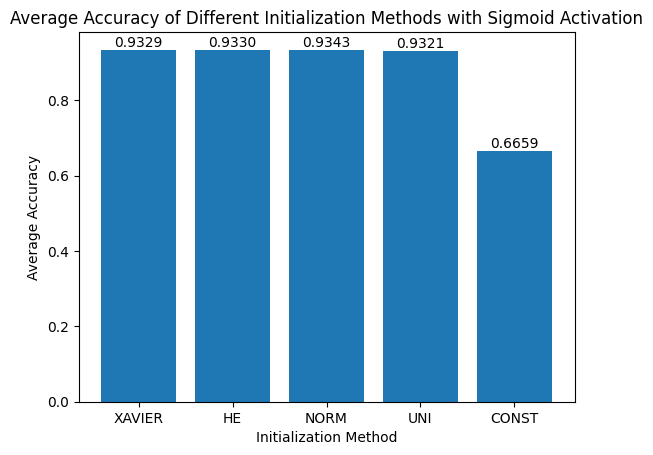

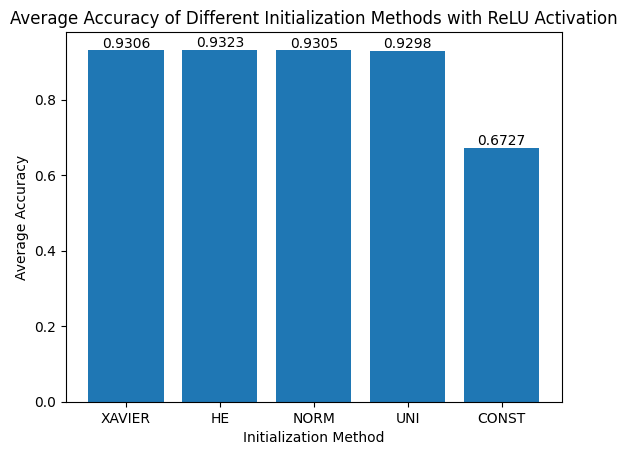

In [21]:
#plot for Sigmoid Activation
plt.title("Average Accuracy of Different Initialization Methods with Sigmoid Activation")
plt.xlabel("Initialization Method")
plt.ylabel("Average Accuracy")
bars_sigmoid = plt.bar(range(len(sigmoid_accuracies)), sigmoid_accuracies, tick_label=["XAVIER", "HE", "NORM", "UNI", "CONST"])

for bar, acc in zip(bars_sigmoid, sigmoid_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.4f}', ha='center', va='bottom')

plt.show()

#plot for ReLU Activation
plt.title("Average Accuracy of Different Initialization Methods with ReLU Activation")
plt.xlabel("Initialization Method")
plt.ylabel("Average Accuracy")
bars_relu = plt.bar(range(len(relu_accuracies)), relu_accuracies, tick_label=["XAVIER", "HE", "NORM", "UNI", "CONST"])

# Add values on top of the bars for ReLU Activation
for bar, acc in zip(bars_relu, relu_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.4f}', ha='center', va='bottom')

plt.show()

<div style="background-color:#f1be3e">

#### Discussion
From the plots above, we see that weight initialization using Xavier, He, normal, and uniform methods yielded quite similar results. In this case,  initialization using the uniform distribution provided the best results at 0.934 for sigmoid, and He provided the best result at 0.932 (which was unsurprising, as this is in line with what the lectures taught us). Meanwhile, setting all the weights to a constant led to significantly lower performance compared to the other methods at an accuracy of 0.666 and 0.67. The plots show that there doesn't seem to be a noticeable difference when using different initialization methods that utilize randomness.

#### Analysis and Explanation
These results agree with what has been established in the lectures; Randomness in setting weights is required when training multi-layer perceptrons. This is why setting all weights to a constant proved to perform the worst out of all the initialization methods tried out. This causes a symmetry in the MLP. 

In [22]:
### Further Exploration
def average_train(input, iter = 5):
    '''
    This method takes the "layers"part of a network and trains it with set paramaters. It will do this the provided iter amount of times, which is by default set to 5.
    It will then return a dataframe witht the averaged results.
    '''
    data = {'lr': [], 'batch_size': [], 'epochs': [], 'layer': [], 'activation_func': [], 'weight_init': [], 'stop_early': [], 'losses': [], 'accuracies': [], 'training_time': []}
   
    # do for all provided layers 
    for layer, weight_init, activation_func in input:
        
        
        # initialize arrays to average over
        agg_losses = []
        agg_accuracy = []
        agg_training_time = []
        
        # train a network with the same paramaters the provided number (iter) of times.
        for _ in range(iter):
            
            # initialize network
            net = initialize_network(layer, weight_init, activation_func)

            # train the network and record the time
            start_time = time.time()
            losses, accuracy, _ = train(net, features, targets, lr=0.01, batch_size=64, epochs=1000, stop_early_threshold=64)
            end_time = time.time()

            # calculate time taken
            time_taken = end_time - start_time
            
            # append results to the previously initialized arrays
            agg_losses.append(losses)
            agg_accuracy.append(accuracy)
            agg_training_time.append(time_taken)
        
        # calculate the average loss
        reshaped_losses = zip(*agg_losses)
        average_losses = [tuple(np.mean(t, axis=0)) for t in reshaped_losses]

        #calculate the averate accuracy
        max_length = max(len(arr) for arr in agg_accuracy)
        padde_array = [arr + [arr[-1]] * (max_length - len(arr)) for arr in agg_accuracy]
        average_accuracy = list(np.mean(padde_array, axis=0))


        # add everyting to the data frame
        data['lr'].append(0.01)  
        data['batch_size'].append(64)
        data['epochs'].append(1000)  
        data['layer'].append(layer)
        data['activation_func'].append([type(obj).__name__.split('_')[-1] for obj in activation_func])
        data['stop_early'].append(64) 
        data['losses'].append(average_losses)
        data['accuracies'].append([average_accuracy, [1]])
        data['training_time'].append(sum(agg_training_time) / len(agg_training_time))

        if isinstance(weight_init, list):
            data['weight_init'].append([obj.value for obj in weight_init])
        else:
            data['weight_init'].append(weight_init.value)
    
    return pd.DataFrame(data)


def print_plots(df):

    fig, axs = plt.subplots(5, 3, figsize=(18, 35), gridspec_kw={'width_ratios': [0.4, 0.4, 0.2]})

    for i in range(len(df)):
        # plot losses over time
        axs[i, 0].plot(df.iloc[i]['losses'])
        axs[i, 0].set_title(f"Loss over time\nEnd Loss: {df.iloc[i]['losses'][-1][-1]:.4f}")

        # plot accuracies over time
        axs[i, 1].plot(df.iloc[i]['accuracies'][0])
        axs[i, 1].set_title(f"Accuracy over time\nEnd Accuracy: {df.iloc[i]['accuracies'][0][-1]:.4f}")

        # show information about the ANN
        text_annotaion = (f"lr: {df.iloc[i]['lr']}\n training time: {df.iloc[i]['training_time']:.2f} seconds\n batch size: {df.iloc[i]['batch_size']}\n max epochs {df.iloc[i]['epochs']}\n stop early threshold: {df.iloc[i]['stop_early']}\n weight init: {df.iloc[i]['weight_init']}\n activation func: {df.iloc[i]['activation_func']}\nmax accuracy: {max(df.iloc[i]['accuracies'][0]):.4f}\nmin val loss: {min([tuple[-1] for tuple in df.iloc[i]['losses']]):.4f}")
        text_annotation_y = axs[i, 2].get_position().y0 + i*0.05
        axs[i, 2].axis('off')
        axs[i, 2].text(0.5, text_annotation_y, text_annotaion, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, pad= 0.2))
        
    plt.tight_layout()
    plt.show()

In [23]:
layers_sizes = [[10, 9, 8, 7, 7]]
weight_init_methods = [Weight_Initialization.XAVIER, Weight_Initialization.HE, Weight_Initialization.UNIFORM]

layers = []

layers.append((layers_sizes[0], [Weight_Initialization.XAVIER, Weight_Initialization.HE, Weight_Initialization.XAVIER, Weight_Initialization.XAVIER], [Activation_Sigmoid(), Activation_ReLU(), Activation_Tanh(), Activation_Softmax()]))
layers.append((layers_sizes[0], [Weight_Initialization.HE, Weight_Initialization.XAVIER, Weight_Initialization.HE, Weight_Initialization.XAVIER], [Activation_LReLU(), Activation_Sigmoid(), Activation_ReLU(), Activation_Softmax()]))
layers.append((layers_sizes[0], [Weight_Initialization.HE, Weight_Initialization.XAVIER, Weight_Initialization.XAVIER, Weight_Initialization.XAVIER], [Activation_ReLU(), Activation_Sigmoid(), Activation_Tanh(), Activation_Softmax()]))
layers.append((layers_sizes[0], [Weight_Initialization.XAVIER, Weight_Initialization.HE, Weight_Initialization.HE, Weight_Initialization.XAVIER], [Activation_Tanh(), Activation_LReLU(), Activation_ReLU(), Activation_Softmax()]))
layers.append((layers_sizes[0], [Weight_Initialization.UNIFORM, Weight_Initialization.UNIFORM, Weight_Initialization.UNIFORM, Weight_Initialization.UNIFORM], [Activation_Sigmoid(), Activation_LReLU(), Activation_Sigmoid(), Activation_Softmax()]))

tdf = average_train(layers)


stopped early at epoch: 661
this validation loss was: 0.2344973623389264, best validation loss was: 0.2297303274026809
final accurracy was: 0.9198988195615514
stopped early at epoch: 743
this validation loss was: 0.2235398569040756, best validation loss was: 0.21917981809927717
final accurracy was: 0.9224283305227656
stopped early at epoch: 717
this validation loss was: 0.24190109672033624, best validation loss was: 0.23849038717304274
final accurracy was: 0.9165261382799326
stopped early at epoch: 802
this validation loss was: 0.23787144167638613, best validation loss was: 0.23661204993885682
final accurracy was: 0.924114671163575
stopped early at epoch: 994
this validation loss was: 0.2235409292437533, best validation loss was: 0.2209641571161603
final accurracy was: 0.9249578414839797
stopped early at epoch: 619
this validation loss was: 0.24533892358392437, best validation loss was: 0.24279429309676612
final accurracy was: 0.9215851602023609
stopped early at epoch: 853
this validat

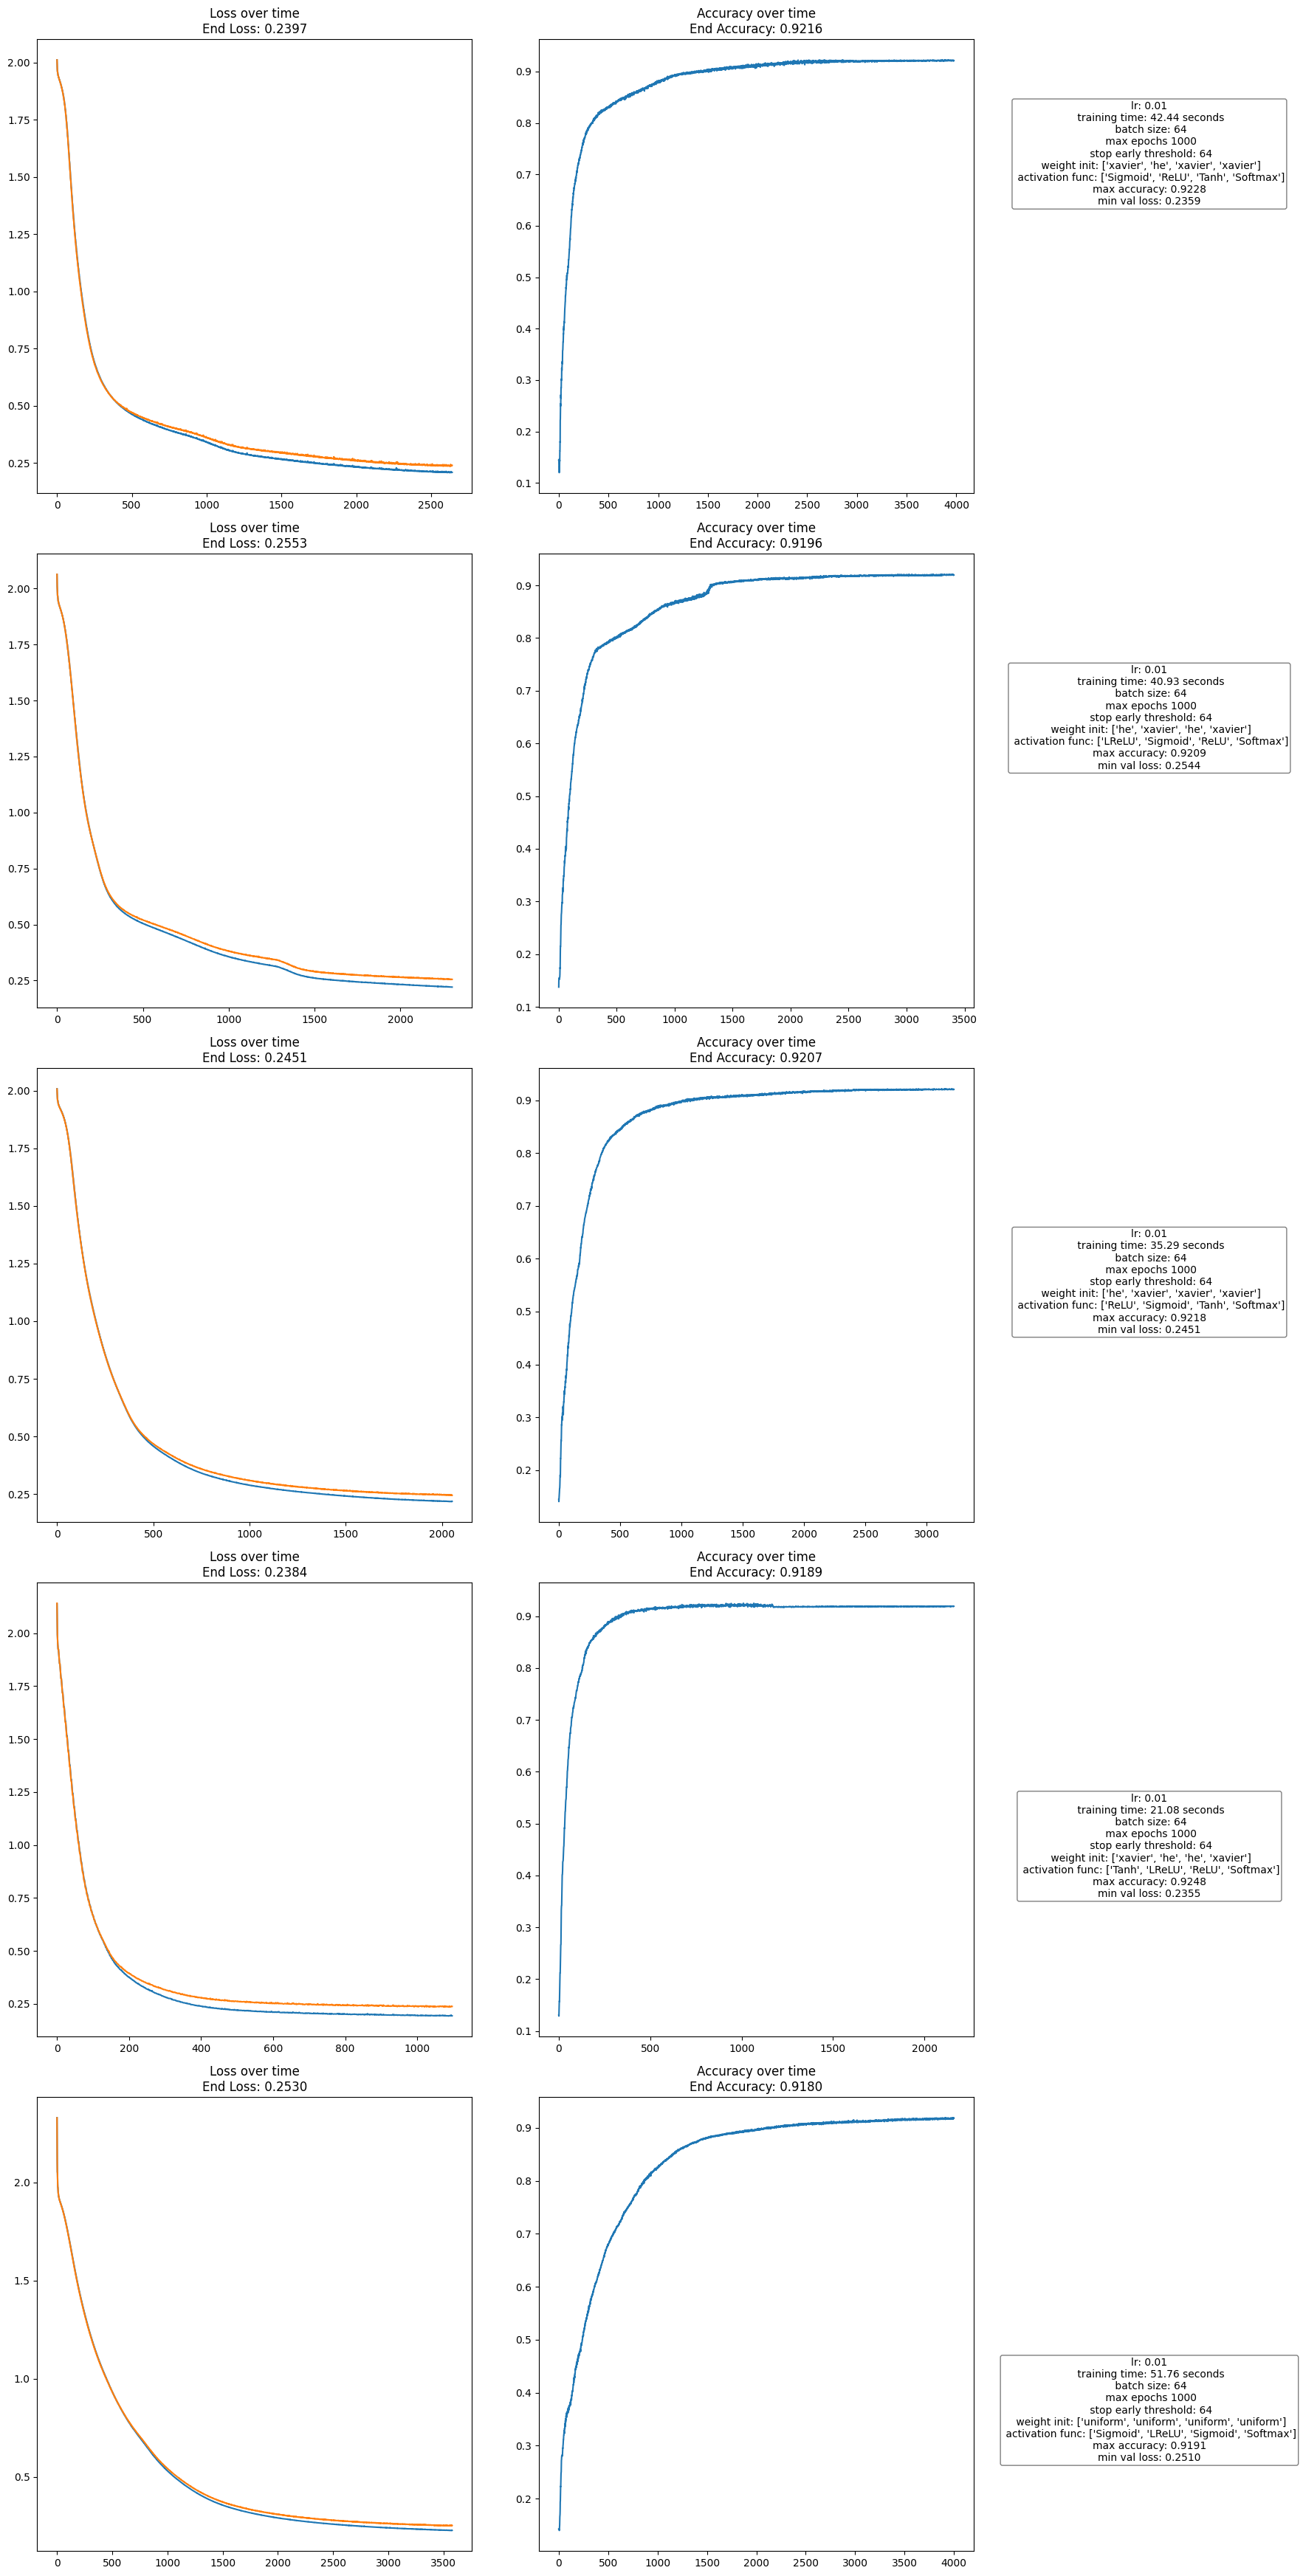

In [24]:
print_plots(tdf)

 ##### Further Exploration: Different Activation Functions and/or Weight Initialization Methods per layer

For these plots the: number of neurons, number of layers, learning rate, max epochs, stop early threshold and batch size are constant, for each plot they are the same. The only thing differing is the combination of activation functions and weight initializations.
 
We see that the activation function and initialization combinations do not have a pretty significant effect on performance of the network. The results range between 0.91 and 0.93. However, there is a noticeable difference in terms of convergence and how many steps it takes to train each network. For instance, we see that the last plot takes significantly more steps to converge compared to the others. From this exploration, we see that while there may not be a large difference in performance when using different functions and weight initializations per layer, there might be a significant change in training time with certain combinations.

### 1.4 Optimization

#### Question 11

In [25]:
def performance_q11(network, train_inputs, train_labels, val_inputs, val_labels, test_inputs, test_labels):#q11
    train_q10(network, train_inputs, train_labels, val_inputs, val_labels, epochs=200)
    y_pred = network.forward(test_inputs)
    return get_accuracy(test_labels, y_pred)

In [26]:
(train_inputs, train_labels), (val_inputs, val_labels), (test_inputs, test_labels) = split_data(features, targets) #q11

XVals = range(7, 31, 3)

sigmoid_accuracies = []
for val in tqdm(XVals):
    network_sig = initialize_network([10, val, 7], weight_initialization=Weight_Initialization.XAVIER, hidden_layer_function=Activation_Sigmoid())
    sigmoid_accuracies.append(cross_validation_q10_unbias(network_sig, features, targets))


 80%|████████  | 4/5 [00:25<00:06,  6.25s/it]

stopped early at epoch: 140
this validation loss was: 0.22929396009220335, best validation loss was: 0.22784076947709714



 12%|█▎        | 1/8 [00:30<03:35, 30.84s/it]

stopped early at epoch: 131
this validation loss was: 0.2112735666852176, best validation loss was: 0.20802923658870753



 20%|██        | 1/5 [00:04<00:16,  4.23s/it]

stopped early at epoch: 99
this validation loss was: 0.22864895799254914, best validation loss was: 0.226613723056148



 40%|████      | 2/5 [00:08<00:13,  4.46s/it]

stopped early at epoch: 107
this validation loss was: 0.2148586594930873, best validation loss was: 0.21277182119287097



 60%|██████    | 3/5 [00:14<00:09,  4.84s/it]

stopped early at epoch: 125
this validation loss was: 0.22911975810373278, best validation loss was: 0.22708925694351917



 80%|████████  | 4/5 [00:18<00:04,  4.75s/it]

stopped early at epoch: 109
this validation loss was: 0.19073758157671833, best validation loss was: 0.19016662064001655



 20%|██        | 1/5 [00:04<00:17,  4.38s/it]

stopped early at epoch: 103
this validation loss was: 0.21461102240181115, best validation loss was: 0.2138180894251446



 40%|████      | 2/5 [00:10<00:16,  5.60s/it]

stopped early at epoch: 117
this validation loss was: 0.19485002321528108, best validation loss was: 0.192090498021526



 60%|██████    | 3/5 [00:16<00:11,  5.85s/it]

stopped early at epoch: 112
this validation loss was: 0.20316118834438165, best validation loss was: 0.20290610619638785



 80%|████████  | 4/5 [00:24<00:06,  6.37s/it]

stopped early at epoch: 121
this validation loss was: 0.19683725041363426, best validation loss was: 0.1961033614418375



 38%|███▊      | 3/8 [01:27<02:26, 29.24s/it]

stopped early at epoch: 117
this validation loss was: 0.20080693526054216, best validation loss was: 0.19798425670469544



 20%|██        | 1/5 [00:07<00:29,  7.38s/it]

stopped early at epoch: 133
this validation loss was: 0.1821201769545015, best validation loss was: 0.17958964232816826



 40%|████      | 2/5 [00:13<00:19,  6.47s/it]

stopped early at epoch: 107
this validation loss was: 0.20862416736241335, best validation loss was: 0.20728598097318196



 60%|██████    | 3/5 [00:19<00:12,  6.45s/it]

stopped early at epoch: 108
this validation loss was: 0.1957658217984745, best validation loss was: 0.19401003500547204



 80%|████████  | 4/5 [00:25<00:06,  6.23s/it]

stopped early at epoch: 94
this validation loss was: 0.20219743356897857, best validation loss was: 0.200051721573039



 50%|█████     | 4/8 [01:57<01:58, 29.71s/it]

stopped early at epoch: 83
this validation loss was: 0.21433451416465743, best validation loss was: 0.2131623675397442



 20%|██        | 1/5 [00:06<00:24,  6.12s/it]

stopped early at epoch: 92
this validation loss was: 0.1977164249592139, best validation loss was: 0.19521133362088838



 40%|████      | 2/5 [00:11<00:16,  5.58s/it]

stopped early at epoch: 98
this validation loss was: 0.2028290853956122, best validation loss was: 0.20147971437479423



 60%|██████    | 3/5 [00:15<00:09,  5.00s/it]

stopped early at epoch: 76
this validation loss was: 0.19244114073700572, best validation loss was: 0.19035670081265033



 80%|████████  | 4/5 [00:19<00:04,  4.52s/it]

stopped early at epoch: 72
this validation loss was: 0.20221334947311892, best validation loss was: 0.20079890614047233



 62%|██████▎   | 5/8 [02:21<01:23, 27.70s/it]

stopped early at epoch: 97
this validation loss was: 0.1976056067873631, best validation loss was: 0.1959536839796576



 20%|██        | 1/5 [00:03<00:15,  3.81s/it]

stopped early at epoch: 80
this validation loss was: 0.19442084274397375, best validation loss was: 0.19307628510500371



 40%|████      | 2/5 [00:08<00:12,  4.13s/it]

stopped early at epoch: 87
this validation loss was: 0.18943158211515163, best validation loss was: 0.18632053400360749



 60%|██████    | 3/5 [00:12<00:08,  4.33s/it]

stopped early at epoch: 92
this validation loss was: 0.19340035342867132, best validation loss was: 0.18973412637156262



 80%|████████  | 4/5 [00:16<00:04,  4.30s/it]

stopped early at epoch: 88
this validation loss was: 0.20183020452818964, best validation loss was: 0.19903101543138169



 75%|███████▌  | 6/8 [02:41<00:50, 25.06s/it]

stopped early at epoch: 61
this validation loss was: 0.21156804080953492, best validation loss was: 0.20950134990951697



 20%|██        | 1/5 [00:06<00:25,  6.38s/it]

stopped early at epoch: 118
this validation loss was: 0.18918084847294325, best validation loss was: 0.18691068801577299



 40%|████      | 2/5 [00:10<00:14,  4.86s/it]

stopped early at epoch: 73
this validation loss was: 0.22450489809619525, best validation loss was: 0.21993737452598763



 60%|██████    | 3/5 [00:14<00:09,  4.80s/it]

stopped early at epoch: 94
this validation loss was: 0.18435787157681413, best validation loss was: 0.18205565893624065



 80%|████████  | 4/5 [00:20<00:05,  5.10s/it]

stopped early at epoch: 108
this validation loss was: 0.20882867485385986, best validation loss was: 0.20379896671195344



 88%|████████▊ | 7/8 [03:08<00:25, 25.44s/it]

stopped early at epoch: 109
this validation loss was: 0.1889778013476452, best validation loss was: 0.1862024724558438



 20%|██        | 1/5 [00:04<00:19,  4.88s/it]

stopped early at epoch: 98
this validation loss was: 0.1997974857372687, best validation loss was: 0.19755549994168337



 40%|████      | 2/5 [00:09<00:13,  4.59s/it]

stopped early at epoch: 87
this validation loss was: 0.19922863419287926, best validation loss was: 0.19776963536990247



 60%|██████    | 3/5 [00:13<00:08,  4.37s/it]

stopped early at epoch: 80
this validation loss was: 0.19833060940030753, best validation loss was: 0.19538007606701485



 80%|████████  | 4/5 [00:18<00:04,  4.55s/it]

stopped early at epoch: 94
this validation loss was: 0.20632377361642415, best validation loss was: 0.20284348731897942



100%|██████████| 8/8 [03:30<00:00, 26.31s/it]

stopped early at epoch: 84
this validation loss was: 0.18810819640643317, best validation loss was: 0.18679772420883203


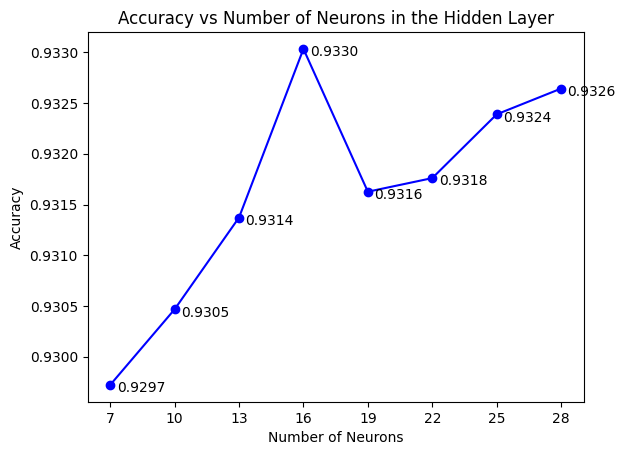

In [27]:
plt.plot(XVals, sigmoid_accuracies, '-bo')
plt.xticks(XVals)
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neurons in the Hidden Layer")

for x, acc in zip(XVals, sigmoid_accuracies):
    plt.text(x+0.3, acc - 0.0001, f'{acc:.4f}', ha='left', va='bottom') #add the accuracy numbers to the points in the graph

plt.show()

<div style="background-color:#f1be3e">

#### Discussion
Accuracy seems to increase along with the number of neurons up to a certain point (in our case, it reaches its peak at 16). Afterward, the accuracy seems to fluctuate.

#### Explanation
We believe that the more neurons there are in the hidden layer, the more capable the model is to model more complex relationships. This explains why there is a positive correlation between the number of neurons and accuracy at first. However, once the relationship is sufficiently captured, adding more neurons only makes the model too sensitive, decreasing its accuracy. This explains the trend between after 16, where the accuracy changes with volatility.  

#### Question 12

In [28]:
def train_q12(net, train_inputs, train_labels, val_inputs, val_labels, lr=0.1, batch_size=32, epochs=200):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        lr: learning rate.
        batch_size: size of the mini batches
        epochs: max number of epochs for training
        
    Returns:
        accuracies_per_epoch: a list of tuples of the training and validation accuracies across epochs
    """
    accuracies_per_epoch = []
    losses_per_epoch = []

    num_mini_batches = len(train_inputs) // batch_size
    
    # For each epoch
    for epoch in range(epochs):
        
        # shuffle the data and split the data into batches
        shuffled_train_inputs, shuffled_train_labels = shuffle_train_data(train_inputs, train_labels)
        
        for i in range(num_mini_batches):
            start = i * batch_size
            end = (i + 1) * batch_size
            x = shuffled_train_inputs[start:end]
            y = shuffled_train_labels[start:end]
            y_pred = net.forward(x)
            _, grad = Loss(y, y_pred)
            
            net.backward(grad)
            net.optimizer_step(lr)
        
        # Get the losses for this epoch
        training_loss, _ = Loss(train_labels, net.forward(train_inputs))
        validation_loss, _ = Loss(val_labels, net.forward(val_inputs))
        losses_per_epoch.append((training_loss, validation_loss))
            
        # Get the accuracies for this epoch
        train_accuracy = get_accuracy(shuffled_train_labels, net.forward(shuffled_train_inputs))
        val_accuracy = get_accuracy(val_labels, net.forward(val_inputs))
        accuracies_per_epoch.append((train_accuracy, val_accuracy))
        
    return losses_per_epoch, accuracies_per_epoch

In [29]:
def plot_loss(losses, accuracies, time_taken=None, lr=None):
    """
    this plots 2 graphs. one containing the training and validation loss, and one containing the accuracy over time.
    """
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    train_loss = [loss[0] for loss in losses]
    val_loss = [loss[1] for loss in losses]

    axs[0].plot(train_loss, label='Training Loss')
    axs[0].plot(val_loss, label='Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Training and Validation Loss over Epochs')
    axs[0].legend()
    axs[0].axis(xmin=0, ymin=min(train_loss) * 0.9, ymax=min(val_loss) * 1.7)
    axs[0].grid(color='grey', linestyle='-')

    
    train_accuracy = [accuracy[0] for accuracy in accuracies]
    val_accuracy = [accuracy[1] for accuracy in accuracies]
    
    axs[1].plot(train_accuracy, label='Training Accuracy')
    axs[1].plot(val_accuracy, label='Validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title("Accuracy over Epochs")
    axs[1].legend()
    axs[1].axis(xmin=0, ymin=max(val_accuracy) * 0.9, ymax=1)
    axs[1].grid(color='grey', linestyle='-')

    plt.tight_layout()
    plt.show()

In [30]:
(train_inputs, train_labels),(val_inputs, val_labels), (test_inputs, test_labels) = split_data(features, targets)
network = initialize_network([10,16,7])
losses_per_epoch, accuracies_per_epoch  = train_q12(network, train_inputs, train_labels, val_inputs, val_labels, epochs=500)

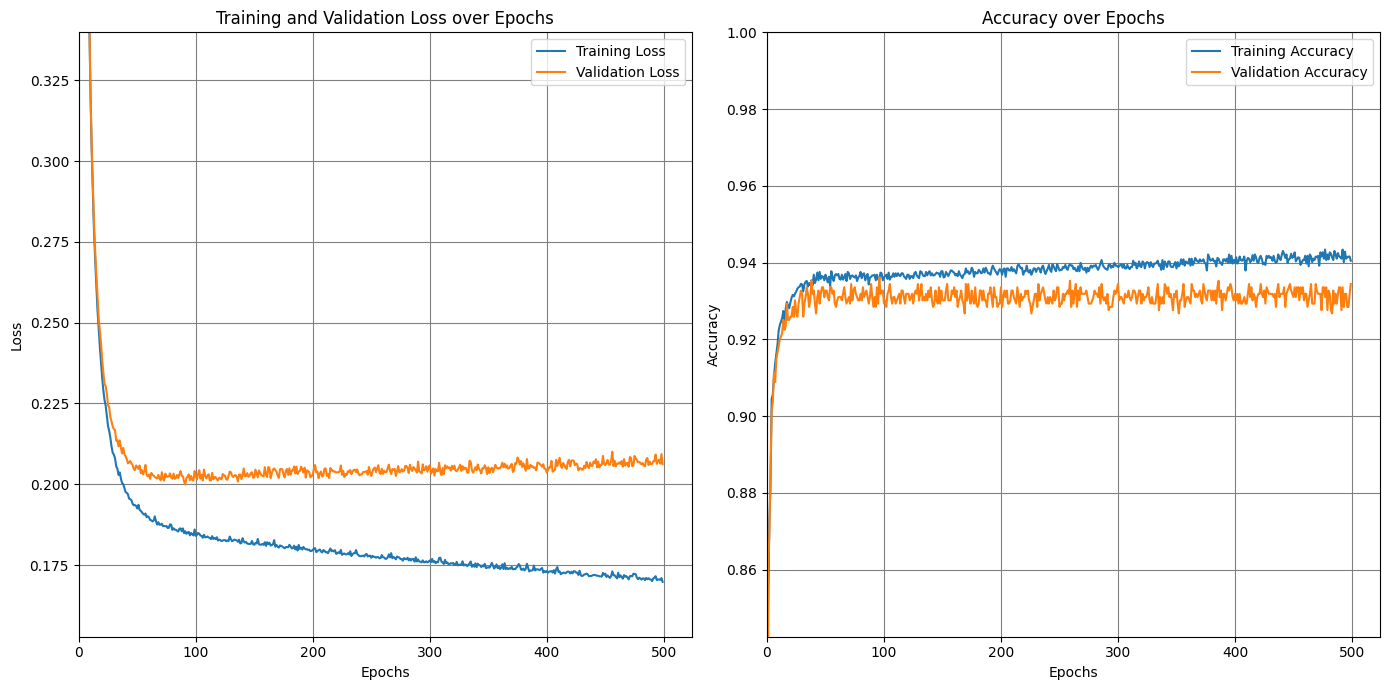

In [31]:
plot_loss(losses_per_epoch, accuracies_per_epoch)

<div style="background-color:#f1be3e">

We choose a hidden layer consisting of 16 neurons, as it performed the best when we tested it against other numbers of neurons in the previous question. It seems to be the optimum in the sense that adding more neurons afterward decreases performance due to increased sensitivity, while decreasing neurons does not seem to capture the relationship of the dataset as well.

From the plots above, we see that the validation accuracy eventually stops getting better, and instead starts decreasing while the training accuracy keeps getting better. As we have implemented early stopping in our model, this means that we are indeed preventing over-fitting and that our model performs its most reasonable best with the hyperparameters we have used.

### 1.5 Evaluation

#### Question 13

In [32]:
network_16= initialize_network([10, 16, 7], weight_initialization=Weight_Initialization.XAVIER, hidden_layer_function=Activation_Sigmoid())

val_accuracies = []
test_accuracies = []

for i in range(10):
    network_copy = copy.deepcopy(network_16)
    train_q10(network_copy, train_inputs, train_labels, val_inputs, val_labels, epochs=200)
    
    val_pred = network_copy.forward(val_inputs)
    val_accuracies.append(get_accuracy(val_labels, val_pred))
    
    test_pred = network_copy.forward(test_inputs)
    test_accuracies.append(get_accuracy(test_labels, test_pred))

print("The average accuracy of the validation set is: ", np.mean(val_accuracies), " and the accuracy of the test set is: ", np.mean(test_accuracies))

stopped early at epoch: 99
this validation loss was: 0.20155346298943647, best validation loss was: 0.19998394229424907
stopped early at epoch: 96
this validation loss was: 0.20237583659660544, best validation loss was: 0.20038266775139982
stopped early at epoch: 108
this validation loss was: 0.2009004202248214, best validation loss was: 0.19984945881999502
stopped early at epoch: 111
this validation loss was: 0.2014930103842471, best validation loss was: 0.20009145307189433
stopped early at epoch: 87
this validation loss was: 0.20310411655977334, best validation loss was: 0.20006515754762078
stopped early at epoch: 107
this validation loss was: 0.20192751050785127, best validation loss was: 0.19968100364020713
stopped early at epoch: 119
this validation loss was: 0.2036856303746135, best validation loss was: 0.2001431873547111
stopped early at epoch: 102
this validation loss was: 0.20241220869145007, best validation loss was: 0.20028327968937157
stopped early at epoch: 88
this validat

Text(0.5, 1.0, 'Average Accuracy of the Validation Set and the Test Set')

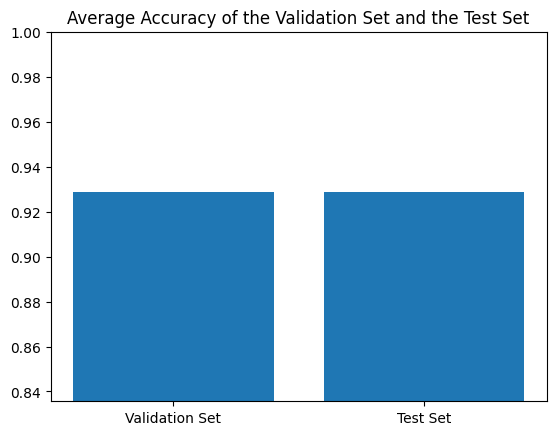

In [33]:
accuracies = [np.mean(val_accuracies), np.mean(test_accuracies)]
plt.bar(range(len(accuracies)), accuracies, tick_label=["Validation Set", "Test Set"])
plt.ylim(min(accuracies) * 0.90, 1)
plt.title("Average Accuracy of the Validation Set and the Test Set")

<div style="background-color:#f1be3e">

The validation and test sets had pretty similar results. While we did use the validation loss for early stopping, this does not guarantee that the validation accuracy will be higher than the test accuracy, as the two sets may have similar loss plot figures, which leads to similar optimal stopping checkpoints.

#### Question 14

In [34]:
def confusion_matrix(features, targets, network):
    y_pred = network.forward(features)
    y_pred = np.argmax(y_pred, axis=1)
    confusion_matrix = np.zeros((7,7))
    for i in range(len(targets)):
        confusion_matrix[targets[i].astype(int)-1, y_pred[i]] += 1
    return confusion_matrix

network_16= initialize_network([10, 16, 7], weight_initialization=Weight_Initialization.XAVIER, hidden_layer_function=Activation_Sigmoid())
train_q10(network_16, train_inputs, train_labels, val_inputs, val_labels, epochs=200)

stopped early at epoch: 107
this validation loss was: 0.21200396622581505, best validation loss was: 0.20893359829822097


In [35]:
df = pd.DataFrame(data=confusion_matrix(test_inputs, test_labels, network_16).astype(int), index=range(1,8), columns=range(1,8))
display(df)

diagonal_elements = [df.iloc[i, i] for i in range(df.shape[0])]
diagonal_elements / df.sum(axis=0)

,1,2,3,4,5,6,7
1,159,0,5,2,1,1,1
2,0,161,4,0,1,0,3
3,8,1,153,1,6,0,2
4,1,1,1,162,0,2,1
5,4,1,3,2,154,5,1
6,0,2,0,2,0,163,3
7,1,4,4,5,0,1,154


1    0.919075
2    0.947059
3    0.900000
4    0.931034
5    0.950617
6    0.947674
7    0.933333
dtype: float64

<div style="background-color:#f1be3e">

This confusion matrix tells us about how our model classified the test set. The rows represent the actual/correct labels of the data, and the columns represent the classes that the data points were classified as. Thus, the diagonal spanning from the top left to the bottom right tells us how much of the dataset was correctly classified. Any other cell counts a specific classification error. 

From our confusion matrix, we see that the top-left to bottom-right diagonal is much larger than the other cells in our matrix, which means that our classifier did a pretty good job at this classifying task. We can sum across the rows and get the number of samples for each label in the test set and then use the corresponding diagonal to calculate the percentage of the true positive cases for each class as shown above. As we can see, the class accuracies range between 0.9 and 0.95, which means that it has a well-rounded performance across all classes. This is the benefit of ensuring that our dataset's class distribution is preserved across all sets during our initial split.

#### Question 15

<div style="background-color:#f1be3e">

Score: 18/20

### 1.6 Scikit-learn

#### Question 16

```python
grid = [{
    # Network architecture
    'hidden_layer_sizes': [[5,5], [5, 5, 5], [9,8,7], [10,15,10,7], [30, 20, 10], [16], [100, 100, 100, 100, 100], [100, 70, 40, 20, 10]], # A list of integers
    'activation': ["identity", "logistic", "relu", "tanh"], # "identity", "logistic", "tanh", "relu"
    'alpha': [0, 0.01, 0.1], # Float
    
    # Optimizations parameters
    'solver': ["adam", "sgd"], # "sgd", "adam"
    'learning_rate_init': [0.005, 0.01, 0.1], # Float
    
    # Fitting parameters
    'max_iter': [200, 1000], # Integer
    'batch_size': ["auto", 32, 64, 128], # "auto" or an integer.
    
    # Validation
    'validation_fraction': [validation_fraction * len(features) * (1 - test_fraction) / len(features)], #Do not change this one.
    'early_stopping': [True], # Boolean, it is best to leave this on True.
    'n_iter_no_change': [10],# Integer
    'tol': [1e-4], # Float
    "random_state": [random_seed]
}]
```

<div style="background-color:#f1be3e">
(Code excerpt above) The parameters used for grid search.

#### Rationale behind parameters chosen:
We wanted to experiment a lot with hidden layers when starting this, and we tried a pretty diverse variety to try out many different combinations. We have small and dense networks here to try to see which would perform the best with our chosen dataset. As we are trying both small and large networks, we also thought it would be best if we also had activation functions that would suit for both sizes (ex: it is generally accepted that logistic activations work well with small networks, and that functions similar to ReLU often work better with larger networks). Batch size is another parameter we thought would be appropriate to tune and explain here, as we expect a small batch size to be too volatile, but a large batch to be too insensitive. Thus, we experiment with different values to find the right balance.

#### Results
Best parameters found by grid search:
-activation: identity
-alpha: 0.1
-batch_size: auto
-early_stopping: True
-hidden_layer_sizes: [30, 20, 10]
-learning_rate_init: 0.005
-max_iter: 200
-n_iter_no_change: 10
-random_state: 42
-solver: adam
-tol: 0.0001
-validation_fraction: 0.12749999999999997

_Are the values of these parameters different from the ones you chose? What differences can you see in the training behaviour and performance of the two networks?_

Yes, these parameters are quite different from the ones chosen. There are some note-worthy differences to inspect, including:
1. Regarding activation functions: The identity activation outperforming all the other functions was very surprising. We would have expected the sigmoid or tanh to have taken this spot, as the network was relatively small, consisting of only 3 hidden layers. This diversion from our expectation seems to suggest that our data is very linearly related, as our data seems to classify really nicely even as a linear combination. We had not even considered this activation function, as we thought conventional wisdom (using logistic and linear functions) would be a more appropriate first step and more in-line with literature.
2. Regarding batch sizes: It was mentioned that small batch sizes were expected to be volatile, but the real shocker was that the largest of the batch sizes turned out to perform the best! 'Auto' here is defined as min(n_samples, 200), and seeing as our dataset consists of 7000+ samples, this means our grid search was running on batches of size 200. We had expected this to be between 32 and 128, as in q10, those two had results that were pretty similar. However, given that the activation function chosen was different, this might have contributed to this difference in optimal batch sizes.
3. Regarding learning rate: This was not as surprising as this was the smallest of the values chosen. We did not try this in our model as it could significantly increase training time, but a small learning rate means that the model has a better chance of arriving the closest to the local minima instead of bouncing around it.
4. Regarding max_iter: The best max iterations that was found is 200 iterations. You may think it is surprising that more iterations is not better, but we suspect that it does not even hit the 200 iterations often. We probably terminate training early almost every time, even with a tolerance of 0.0001 and 10 iterations of no change as thresholds. In our implementation we only use one threshold, we look how many checkpoints it has been since we have improved our best score so far, if we hit our threshold we terminate. When not using sigmoid we hit that almost every time before 200 epochs.
5. Regarding architecture: It was surprising that a deeper architecture was capable of yielding better results. This seems to suggest that our dataset has a more complex relationship that is not fully grasped with just one hidden layer, even though we had a pretty good accuracy nearing 0.93 with it. This opens up new avenues for us to explore in the future. 

Performance:
Resulting Training Cross-Entropy loss: 0.22741137853635052
Resulting Test Cross-Entropy loss: 0.17713408163166758

Resulting Training accuracy: 0.9330337078651686
Resulting Validation accuracy: 0.9401408450704225
Resulting Test accuracy: 0.9372349448685326

Resulting Training MSE: 0.01451927932021346
Resulting Test MSE: 0.01336624708336899

![Q16 Training Loss](<q16_training_loss.png>)
![Q16 Validation Accuracy](<q16_validation_accuracy.png>)

Further on performance:
As you can see, all the values here lie close together. This is a good sign, as it shows we are not over fitting. Looking at the two plots shows that we have stopped at the correct time, as the training loss has plateaued and validation accuracy has begun to hover around a small range.


#### Question 17

 20%|██        | 1/5 [00:04<00:16,  4.15s/it]

stopped early at epoch: 96
this validation loss was: 0.22771707258683482, best validation loss was: 0.22336014660789538


 40%|████      | 2/5 [00:09<00:14,  4.84s/it]

stopped early at epoch: 122
this validation loss was: 0.17795822830825897, best validation loss was: 0.17704976975732117


 60%|██████    | 3/5 [00:13<00:08,  4.47s/it]

stopped early at epoch: 92
this validation loss was: 0.2089652925188153, best validation loss was: 0.20794460356555802


 80%|████████  | 4/5 [00:17<00:04,  4.28s/it]

stopped early at epoch: 91
this validation loss was: 0.20926124694437404, best validation loss was: 0.20823632520121804


100%|██████████| 5/5 [00:22<00:00,  4.56s/it]

stopped early at epoch: 123
this validation loss was: 0.18007506111963958, best validation loss was: 0.17640946736187302


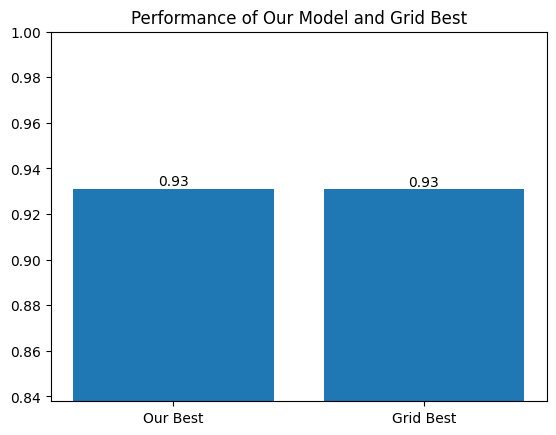

In [36]:
net_grid_best = initialize_network([10, 30, 20, 10, 7], hidden_layer_function=Activation_Identity(), weight_initialization=Weight_Initialization.XAVIER, alpha=0.1)
accuracy_grid = cross_validation_q10_unbias(net_grid_best, features, targets, batch_size=200, epochs=200, lr=0.005)

net_our_best = initialize_network([10, 16, 7], hidden_layer_function=Activation_Sigmoid(), weight_initialization=Weight_Initialization.XAVIER, alpha=0)
accuracy_our = cross_validation_q10_unbias(net_our_best, features, targets)

accuracies = [accuracy_our, accuracy_grid]


plt.bar(range(len(accuracies)), accuracies, tick_label=["Our Best", "Grid Best"])
plt.ylim(min(accuracies) * 0.9, 1)
plt.title("Performance of Our Model and Grid Best")

for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.show()

In [37]:
print("Our Best:", accuracy_our, " Grid Search Best:", accuracy_grid)

Our Best: 0.9311164509809023  Grid Search Best: 0.9309884118995548


<div style="background-color:#f1be3e">

The optimal hyperparameters found by scikit-learn were:

-activation: identity
-alpha: 0.1
-batch_size: auto
-early_stopping: True
-hidden_layer_sizes: [30, 20, 10]
-learning_rate_init: 0.005
-max_iter: 200
-n_iter_no_change: 10
-random_state: 42
-solver: adam
-tol: 0.0001
-validation_fraction: 0.12749999999999997

The model trained with our best hyperparameters performed slightly better than the model trained using the best hyperparameters found by grid search. The difference in performance was not significant, and it could most likely be randomness that is causing this discrepancy between the grid search hyperparameters and our model's best hyperparameters. 

The splitting of our data at the start, the random initialization of weights, and the shuffling of data in each epoch all contribute to a difference in the two models. 

While we have tried to mitigate the effects of these uncontrollable factors by way of performing several runs and averaging the performances, one model is always going to have a higher score than the other, and in this case, that difference seems to be small enough to be chalked up to luck.  

### 1.7 Reflection

#### Question 18

<div style="background-color:#f1be3e">

 
An example would be a classifier that would predict in which area crime would is more likely to occur. This could be harmful since if the model would predict that area A or area B will have more crime then the other, even by a small margin. Then there would be more control in that area and in turn more arrests will be made in that area. In addition, if we would to update the model it would find that there is even more crime in that area, since we had more arrests there. This would result in a positive feedback loop, where that area could be assumed to be more dangerous and the people there are more dangerous than they actually are. Which if a certain group lived there would create a bias where those people could be assumed more dangerous.

#### Question 19

<div style="background-color:#f1be3e">

Our first solution would be preferential sampling. This entails that we would take more positive labels from the discriminated group and more negative labels for the positive group. Until we create a data set with the same fraction of positive/negative labels for all groups to train our models with. This will result in a model with as little bias as possible since the ratio of labels was equal.

Secondly, we could also only use the model to double-check a certain hypothesis we have, instead of creating the hypothesis. For example if a doctor suspects some patient has a certain cancer then having a model also have check it can be a beneficial second opinion. Since the idea of the patient potentially having cancer came from the model, and not from the doctor the model did not create the hypthesis, merely checked if it found evidence for it. 

This would not always fix the harm produced by unjust classification. Since for example in black-box models it is really hard to determine if there are biases present, or it could be difficult to tell initially if there will be harm done. Additionally, there can be people that may try to intentionally produce harm by using unjust classifiers.

### 1.8 Pen and paper

#### Question 20

<div style="background-color:#f1be3e">

Original Matrix
$$ \begin{bmatrix}
0 & 1 & 1 & 1 & 0 \\
1 & 2 & 6 & 2 & 1 \\
1 & 6 & 8 & 4 & 1 \\
1 & 2 & 4 & 2 & 1 \\
0 & 1 & 1 & 1 & 0 \\
\end{bmatrix}$$

Applying Max Pooling
$$ \begin{bmatrix}
2 & 6 & 6 & 2 \\
6 & 8 & 8 & 4 \\
6 & 8 & 8 & 4 \\
2 & 4 & 4 & 2 \\
\end{bmatrix}$$

Applying Sharpen Kernel
$$ \begin{bmatrix}
12 & 14 \\
14 & 16 \\
\end{bmatrix}$$

Conclusion
$$x_1 = 12 + 14 = 26$$
$$x_2 = 14 +16 = 30$$

#### Question 21

<div style="background-color:#f1be3e">


Calculating z1
$$1.5 \cdot x_1 + -2 \cdot x_2 = 1.5 * 26 + -2 \cdot 30 = -21$$
$$z_1 = \max(0, -21) = 0$$

Calculating z2
$$-1 \cdot x_1 + 1 \cdot x_2 = -1 * 26 + 1 \cdot 30 = 4$$
$$z_2 = \max(0, 4) = 4$$

Calculating y
$$1 \cdot z_1 + 1.5 \cdot z_2 = 1 * 0 + 1.5 \cdot 4 = 6$$
$$y = \max(0, 6) = 6$$

### 1.9 Division of work

#### Question 22

<div style="background-color:#f1be3e">


| Component                   | Di Wu | James Lee | Ruben van Seventer | Timothy Axel |
|-----------------------------|-------|-----------|--------------------|-------------|
| Code (design)               | 25%   | 25%       | 25%                | 25%         |
| Code (implementation)       | 25%   | 25%       | 25%                | 25%         |
| Code (validation)           | 25%   | 25%       | 25%                | 25%         |
| Experiments (execution)     | 25%   | 25%       | 25%                | 25%         |
| Experiments (analysis)      | 25%   | 25%       | 25%                | 25%         |
| Experiments (visualization) | 25%   | 25%       | 25%                | 25%         |
| Report (original draft)     | 25%   | 25%       | 25%                | 25%         |
| Report (reviewing, editing) | 25%   | 25%       | 25%                | 25%         |

### References

<div style="background-color:#f1be3e">

**If you made use of any non-course resources, cite them below.**
Neural Networks from Scratch - Harrison Kinsley, Daniel Kukiela

In [38]:
net_grid_best = initialize_network([10, 30, 20, 10, 7], hidden_layer_function=Activation_Sigmoid(), weight_initialization=Weight_Initialization.XAVIER)
(train_inputs, train_labels), (val_inputs, val_labels), (test_inputs, test_labels)= split_data(features, targets, train_ratio=0.85, val_ratio=0.0, random_seed=42)

train_q10(net_grid_best, train_inputs, train_labels, test_inputs, test_labels, epochs=10000, lr=0.1, batch_size=32)
train_q10(net_grid_best, train_inputs, train_labels, test_inputs, test_labels, epochs=10000, lr=0.01, batch_size=32)

train_q10(net_grid_best, test_inputs, test_labels, train_inputs, train_labels, epochs=2000, lr=0.01, batch_size=32)
unknown_pred = np.argmax(net_grid_best.forward(unknown), axis=1) + 1
display(unknown_pred)

stopped early at epoch: 112
this validation loss was: 0.23660381991483875, best validation loss was: 0.23391313877242184
stopped early at epoch: 64
this validation loss was: 0.23194067888975956, best validation loss was: 0.23073969068048072
stopped early at epoch: 21
this validation loss was: 0.18721689947662, best validation loss was: 0.18353455877021443


array([2, 6, 7, 3, 6, 5, 1, 3, 7, 7, 3, 3, 1, 3, 6, 4, 2, 4, 2, 2, 7, 5,
       6, 6, 5, 1, 5, 3, 1, 6, 6, 4, 4, 4, 4, 4, 5, 2, 3, 7, 4, 6, 5, 5,
       5, 7, 5, 4, 5, 1, 5, 5, 2, 1, 6, 3, 1, 7, 1, 1, 3, 6, 3, 2, 7, 2,
       2, 2, 7, 7, 7, 6, 7, 1, 4, 1, 4, 4, 1, 7, 1, 7, 1, 4, 4, 2, 3, 2,
       1, 7, 6, 2, 7, 1, 2, 7, 2, 2, 5, 2, 5, 7, 5, 5, 2, 6, 5, 6, 2, 3,
       7, 4, 1, 5, 5, 7, 5, 2, 4, 4, 7, 1, 2, 1, 1, 4, 7, 4, 7, 7, 7, 6,
       6, 7, 7, 4, 4, 4, 3, 5, 3, 4, 1, 3, 2, 6, 6, 5, 4, 1, 7, 4, 1, 7,
       1, 3, 7, 4, 3, 6, 7, 7, 3, 4, 1, 5, 6, 2, 5, 5, 5, 1, 6, 4, 7, 3,
       3, 5, 5, 1, 3, 4, 1, 1, 2, 3, 3, 2, 5, 3, 4, 6, 1, 6, 6, 2, 2, 3,
       6, 7, 7, 2, 5, 3, 5, 6, 7, 4, 2, 2, 5, 6, 2, 6, 6, 4, 2, 6, 1, 3,
       1, 3, 6, 2, 2, 6, 7, 1, 6, 1, 1, 5, 2, 4, 5, 4, 1, 4, 7, 7, 4, 1,
       5, 5, 3, 1, 1, 6, 6, 5, 4, 4, 6, 2, 6, 6, 6, 1, 5, 3, 5, 3, 3, 6,
       1, 2, 6, 6, 6, 2, 4, 5, 3, 5, 3, 3, 4, 7, 6, 4, 3, 6, 7, 7, 2, 7,
       7, 2, 1, 4, 6, 3, 4, 5, 4, 6, 4, 7, 4, 4, 2,

In [39]:
file = open("58_classes.txt", "w") # overwrite the file
for i in range(len(unknown_pred)):
    if i < (len(unknown_pred) - 1):
        file.write(f"{unknown_pred[i]}, ")
    else:
        file.write(f"{unknown_pred[i]}")
file.close()